# COST SENSITIVE LEARNING

#### Importing necessary packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import arff

pd.pandas.set_option('display.max_columns',None)

#### Importing and understanding dataset

In [2]:
data = arff.loadarff("german credit.arff")
db = pd.DataFrame(data[0])
db.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,b'<0',6.0,b'critical/other existing credit',b'radio/tv',1169.0,b'no known savings',b'>=7',4.0,b'male single',b'none',4.0,b'real estate',67.0,b'none',b'own',2.0,b'skilled',1.0,b'yes',b'yes',b'good'
1,b'0<=X<200',48.0,b'existing paid',b'radio/tv',5951.0,b'<100',b'1<=X<4',2.0,b'female div/dep/mar',b'none',2.0,b'real estate',22.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'bad'
2,b'no checking',12.0,b'critical/other existing credit',b'education',2096.0,b'<100',b'4<=X<7',2.0,b'male single',b'none',3.0,b'real estate',49.0,b'none',b'own',1.0,b'unskilled resident',2.0,b'none',b'yes',b'good'
3,b'<0',42.0,b'existing paid',b'furniture/equipment',7882.0,b'<100',b'4<=X<7',2.0,b'male single',b'guarantor',4.0,b'life insurance',45.0,b'none',b'for free',1.0,b'skilled',2.0,b'none',b'yes',b'good'
4,b'<0',24.0,b'delayed previously',b'new car',4870.0,b'<100',b'1<=X<4',3.0,b'male single',b'none',4.0,b'no known property',53.0,b'none',b'for free',2.0,b'skilled',2.0,b'none',b'yes',b'bad'


In [3]:
object_columns = db.select_dtypes(include=['object']).columns.tolist()
print(object_columns)

['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker', 'class']


In [4]:
for i in object_columns:
    db[i] = db[i].str.decode('utf-8').str.strip("b'")
db.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,ad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,ad


In [6]:
db.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [7]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [8]:
db[object_columns].describe()

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2,2
top,no checking,existing paid,radio/tv,<100,1<=X<4,male single,none,car,none,own,skilled,none,yes,good
freq,394,530,280,603,339,548,907,332,814,713,630,596,963,700


In [9]:
for feature in object_columns:
    labels_ordered=db.groupby([feature])["credit_amount"].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    db[feature]=db[feature].map(labels_ordered)
db.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,2,6.0,1,2,1169.0,4,2,4.0,2,1,4.0,0,67.0,0,0,2.0,2,1.0,1,1,0
1,3,48.0,0,2,5951.0,2,1,2.0,1,1,2.0,0,22.0,0,0,1.0,2,1.0,0,1,1
2,1,12.0,1,6,2096.0,2,3,2.0,2,1,3.0,0,49.0,0,0,1.0,0,2.0,0,1,0
3,2,42.0,0,5,7882.0,2,3,2.0,2,0,4.0,1,45.0,0,2,1.0,2,2.0,0,1,0
4,2,24.0,3,4,4870.0,2,1,3.0,2,1,4.0,3,53.0,0,2,2.0,2,2.0,0,1,1


In [10]:
for i in db.columns[:-1]:
    db[i] = (db[i] - db[i].min()) / (db[i].max() - db[i].min())
db.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,0.666667,0.029412,0.25,0.222222,0.050567,1.0,0.50,1.000000,0.666667,0.5,1.000000,0.000000,0.857143,0.0,0.0,0.333333,0.666667,0.0,1.0,1.0,0
1,1.000000,0.647059,0.00,0.222222,0.313690,0.5,0.25,0.333333,0.333333,0.5,0.333333,0.000000,0.053571,0.0,0.0,0.000000,0.666667,0.0,0.0,1.0,1
2,0.333333,0.117647,0.25,0.666667,0.101574,0.5,0.75,0.333333,0.666667,0.5,0.666667,0.000000,0.535714,0.0,0.0,0.000000,0.000000,1.0,0.0,1.0,0
3,0.666667,0.558824,0.00,0.555556,0.419941,0.5,0.75,0.333333,0.666667,0.0,1.000000,0.333333,0.464286,0.0,1.0,0.000000,0.666667,1.0,0.0,1.0,0
4,0.666667,0.294118,0.75,0.444444,0.254209,0.5,0.25,0.666667,0.666667,0.5,1.000000,1.000000,0.607143,0.0,1.0,0.333333,0.666667,1.0,0.0,1.0,1


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [13]:
X = db.drop('class', axis = 1)
Y = db['class']

In [14]:
X.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,0.666667,0.029412,0.25,0.222222,0.050567,1.0,0.50,1.000000,0.666667,0.5,1.000000,0.000000,0.857143,0.0,0.0,0.333333,0.666667,0.0,1.0,1.0
1,1.000000,0.647059,0.00,0.222222,0.313690,0.5,0.25,0.333333,0.333333,0.5,0.333333,0.000000,0.053571,0.0,0.0,0.000000,0.666667,0.0,0.0,1.0
2,0.333333,0.117647,0.25,0.666667,0.101574,0.5,0.75,0.333333,0.666667,0.5,0.666667,0.000000,0.535714,0.0,0.0,0.000000,0.000000,1.0,0.0,1.0
3,0.666667,0.558824,0.00,0.555556,0.419941,0.5,0.75,0.333333,0.666667,0.0,1.000000,0.333333,0.464286,0.0,1.0,0.000000,0.666667,1.0,0.0,1.0
4,0.666667,0.294118,0.75,0.444444,0.254209,0.5,0.25,0.666667,0.666667,0.5,1.000000,1.000000,0.607143,0.0,1.0,0.333333,0.666667,1.0,0.0,1.0


In [15]:
Y.head()

0    0
1    1
2    0
3    0
4    1
Name: class, dtype: int64

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, 
                                                    random_state = 20, stratify = Y)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 20)
(200, 20)
(800,)
(200,)


### Without CSL

#### Logistic Regression

In [18]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [19]:
y_predict = lr.predict(x_test)

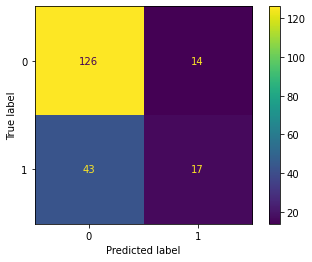

In [20]:
cm = confusion_matrix(y_test, y_predict)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [21]:
print(accuracy_score(y_test, y_predict))
print(precision_score(y_test, y_predict))
print(recall_score(y_test, y_predict))
print(f1_score(y_test, y_predict))

0.715
0.5483870967741935
0.2833333333333333
0.37362637362637363


##### Hyperparameter Tuning

In [22]:
param_grid = [{
    "penalty":["l1","l2","elasticnet"],
    "C":np.logspace(-5, 8, 15),
    'verbose':[0,1,2,3]
}]

grid_search = GridSearchCV(lr, param_grid, cv = 3, scoring = "accuracy", verbose = 10)
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits
[CV 1/3; 1/180] START C=1e-05, penalty=l1, verbose=0............................
[CV 1/3; 1/180] END ..........C=1e-05, penalty=l1, verbose=0; total time=   0.0s
[CV 2/3; 1/180] START C=1e-05, penalty=l1, verbose=0............................
[CV 2/3; 1/180] END ..........C=1e-05, penalty=l1, verbose=0; total time=   0.0s
[CV 3/3; 1/180] START C=1e-05, penalty=l1, verbose=0............................
[CV 3/3; 1/180] END ..........C=1e-05, penalty=l1, verbose=0; total time=   0.0s
[CV 1/3; 2/180] START C=1e-05, penalty=l1, verbose=1............................
[CV 1/3; 2/180] END ..........C=1e-05, penalty=l1, verbose=1; total time=   0.0s
[CV 2/3; 2/180] START C=1e-05, penalty=l1, verbose=1............................
[CV 2/3; 2/180] END ..........C=1e-05, penalty=l1, verbose=1; total time=   0.0s
[CV 3/3; 2/180] START C=1e-05, penalty=l1, verbose=1............................
[CV 3/3; 2/180] END ..........C=1e-05, penalty

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_valida

[CV 2/3; 6/180] END ..........C=1e-05, penalty=l2, verbose=1; total time=   0.0s
[CV 3/3; 6/180] START C=1e-05, penalty=l2, verbose=1............................
[CV 3/3; 6/180] END ..........C=1e-05, penalty=l2, verbose=1; total time=   0.0s
[CV 1/3; 7/180] START C=1e-05, penalty=l2, verbose=2............................
[CV 1/3; 7/180] END ..........C=1e-05, penalty=l2, verbose=2; total time=   0.0s
[CV 2/3; 7/180] START C=1e-05, penalty=l2, verbose=2............................
[CV 2/3; 7/180] END ..........C=1e-05, penalty=l2, verbose=2; total time=   0.0s
[CV 3/3; 7/180] START C=1e-05, penalty=l2, verbose=2............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/3; 7/180] END ..........C=1e-05, penalty=l2, verbose=2; total time=   0.0s
[CV 1/3; 8/180] START C=1e-05, penalty=l2, verbose=3............................
[CV 1/3; 8/180] END ..........C=1e-05, penalty=l2, verbose=3; total time=   0.0s
[CV 2/3; 8/180] START C=1e-05, penalty=l2, verbose=3............................
[CV 2/3; 8/180] END ..........C=1e-05, penalty=l2, verbose=3; total time=   0.0s
[CV 3/3; 8/180] START C=1e-05, penalty=l2, verbose=3............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


[CV 3/3; 8/180] END ..........C=1e-05, penalty=l2, verbose=3; total time=   0.0s
[CV 1/3; 9/180] START C=1e-05, penalty=elasticnet, verbose=0....................
[CV 1/3; 9/180] END ..C=1e-05, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 2/3; 9/180] START C=1e-05, penalty=elasticnet, verbose=0....................
[CV 2/3; 9/180] END ..C=1e-05, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 3/3; 9/180] START C=1e-05, penalty=elasticnet, verbose=0....................
[CV 3/3; 9/180] END ..C=1e-05, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 1/3; 10/180] START C=1e-05, penalty=elasticnet, verbose=1...................
[CV 1/3; 10/180] END .C=1e-05, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 2/3; 10/180] START C=1e-05, penalty=elasticnet, verbose=1...................
[CV 2/3; 10/180] END .C=1e-05, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 3/3; 10/180] START C=1e-05, penalty=elasticnet, verbose=1...................
[CV 3/3; 10/180] END .C=1e-0

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection

[CV 1/3; 19/180] END C=8.483428982440725e-05, penalty=l2, verbose=2; total time=   0.0s
[CV 2/3; 19/180] START C=8.483428982440725e-05, penalty=l2, verbose=2...........
[CV 2/3; 19/180] END C=8.483428982440725e-05, penalty=l2, verbose=2; total time=   0.0s
[CV 3/3; 19/180] START C=8.483428982440725e-05, penalty=l2, verbose=2...........
[CV 3/3; 19/180] END C=8.483428982440725e-05, penalty=l2, verbose=2; total time=   0.0s
[CV 1/3; 20/180] START C=8.483428982440725e-05, penalty=l2, verbose=3...........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/3; 20/180] END C=8.483428982440725e-05, penalty=l2, verbose=3; total time=   0.0s
[CV 2/3; 20/180] START C=8.483428982440725e-05, penalty=l2, verbose=3...........
[CV 2/3; 20/180] END C=8.483428982440725e-05, penalty=l2, verbose=3; total time=   0.0s
[CV 3/3; 20/180] START C=8.483428982440725e-05, penalty=l2, verbose=3...........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda

[CV 3/3; 20/180] END C=8.483428982440725e-05, penalty=l2, verbose=3; total time=   0.0s
[CV 1/3; 21/180] START C=8.483428982440725e-05, penalty=elasticnet, verbose=0...
[CV 1/3; 21/180] END C=8.483428982440725e-05, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 2/3; 21/180] START C=8.483428982440725e-05, penalty=elasticnet, verbose=0...
[CV 2/3; 21/180] END C=8.483428982440725e-05, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 3/3; 21/180] START C=8.483428982440725e-05, penalty=elasticnet, verbose=0...
[CV 3/3; 21/180] END C=8.483428982440725e-05, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 1/3; 22/180] START C=8.483428982440725e-05, penalty=elasticnet, verbose=1...
[CV 1/3; 22/180] END C=8.483428982440725e-05, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 2/3; 22/180] START C=8.483428982440725e-05, penalty=elasticnet, verbose=1...
[CV 2/3; 22/180] END C=8.483428982440725e-05, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 3/3; 22/180] START C=8.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


[CV 1/3; 31/180] END C=0.0007196856730011522, penalty=l2, verbose=2; total time=   0.0s
[CV 2/3; 31/180] START C=0.0007196856730011522, penalty=l2, verbose=2...........
[CV 2/3; 31/180] END C=0.0007196856730011522, penalty=l2, verbose=2; total time=   0.0s
[CV 3/3; 31/180] START C=0.0007196856730011522, penalty=l2, verbose=2...........
[CV 3/3; 31/180] END C=0.0007196856730011522, penalty=l2, verbose=2; total time=   0.0s
[CV 1/3; 32/180] START C=0.0007196856730011522, penalty=l2, verbose=3...........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/3; 32/180] END C=0.0007196856730011522, penalty=l2, verbose=3; total time=   0.0s
[CV 2/3; 32/180] START C=0.0007196856730011522, penalty=l2, verbose=3...........
[CV 2/3; 32/180] END C=0.0007196856730011522, penalty=l2, verbose=3; total time=   0.0s
[CV 3/3; 32/180] START C=0.0007196856730011522, penalty=l2, verbose=3...........
[CV 3/3; 32/180] END C=0.0007196856730011522, penalty=l2, verbose=3; total time=   0.0s
[CV 1/3; 33/180] START C=0.0007196856730011522, penalty=elasticnet, verbose=0...
[CV 1/3; 33/180] END C=0.0007196856730011522, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 2/3; 33/180] START C=0.0007196856730011522, penalty=elasticnet, verbose=0...
[CV 2/3; 33/180] END C=0.0007196856730011522, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 3/3; 33/180] START C=0.0007196856730011522, penalty=elasticnet, verbose=0...
[CV 3/3; 33/180] END C=0.0007196856730011522, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 1/3; 34/180] START C=0.0007196856730011

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda

[CV 3/3; 35/180] END C=0.0007196856730011522, penalty=elasticnet, verbose=2; total time=   0.0s
[CV 1/3; 36/180] START C=0.0007196856730011522, penalty=elasticnet, verbose=3...
[CV 1/3; 36/180] END C=0.0007196856730011522, penalty=elasticnet, verbose=3; total time=   0.0s
[CV 2/3; 36/180] START C=0.0007196856730011522, penalty=elasticnet, verbose=3...
[CV 2/3; 36/180] END C=0.0007196856730011522, penalty=elasticnet, verbose=3; total time=   0.0s
[CV 3/3; 36/180] START C=0.0007196856730011522, penalty=elasticnet, verbose=3...
[CV 3/3; 36/180] END C=0.0007196856730011522, penalty=elasticnet, verbose=3; total time=   0.0s
[CV 1/3; 37/180] START C=0.006105402296585327, penalty=l1, verbose=0............
[CV 1/3; 37/180] END C=0.006105402296585327, penalty=l1, verbose=0; total time=   0.0s
[CV 2/3; 37/180] START C=0.006105402296585327, penalty=l1, verbose=0............
[CV 2/3; 37/180] END C=0.006105402296585327, penalty=l1, verbose=0; total time=   0.0s
[CV 3/3; 37/180] START C=0.0061054022

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Para

[CV 1/3; 43/180] END C=0.006105402296585327, penalty=l2, verbose=2; total time=   0.0s
[CV 2/3; 43/180] START C=0.006105402296585327, penalty=l2, verbose=2............
[CV 2/3; 43/180] END C=0.006105402296585327, penalty=l2, verbose=2; total time=   0.0s
[CV 3/3; 43/180] START C=0.006105402296585327, penalty=l2, verbose=2............
[CV 3/3; 43/180] END C=0.006105402296585327, penalty=l2, verbose=2; total time=   0.0s
[CV 1/3; 44/180] START C=0.006105402296585327, penalty=l2, verbose=3............
[CV 1/3; 44/180] END C=0.006105402296585327, penalty=l2, verbose=3; total time=   0.0s
[CV 2/3; 44/180] START C=0.006105402296585327, penalty=l2, verbose=3............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/3; 44/180] END C=0.006105402296585327, penalty=l2, verbose=3; total time=   0.0s
[CV 3/3; 44/180] START C=0.006105402296585327, penalty=l2, verbose=3............
[CV 3/3; 44/180] END C=0.006105402296585327, penalty=l2, verbose=3; total time=   0.0s
[CV 1/3; 45/180] START C=0.006105402296585327, penalty=elasticnet, verbose=0....
[CV 1/3; 45/180] END C=0.006105402296585327, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 2/3; 45/180] START C=0.006105402296585327, penalty=elasticnet, verbose=0....
[CV 2/3; 45/180] END C=0.006105402296585327, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 3/3; 45/180] START C=0.006105402296585327, penalty=elasticnet, verbose=0....
[CV 3/3; 45/180] END C=0.006105402296585327, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 1/3; 46/180] START C=0.006105402296585327, penalty=elasticnet, verbose=1....
[CV 1/3; 46/180] END C=0.006105402296585327, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 2/3; 46/180] START C=0.00610540229658

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elast

[CV 3/3; 50/180] START C=0.05179474679231213, penalty=l1, verbose=1.............
[CV 3/3; 50/180] END C=0.05179474679231213, penalty=l1, verbose=1; total time=   0.0s
[CV 1/3; 51/180] START C=0.05179474679231213, penalty=l1, verbose=2.............
[CV 1/3; 51/180] END C=0.05179474679231213, penalty=l1, verbose=2; total time=   0.0s
[CV 2/3; 51/180] START C=0.05179474679231213, penalty=l1, verbose=2.............
[CV 2/3; 51/180] END C=0.05179474679231213, penalty=l1, verbose=2; total time=   0.0s
[CV 3/3; 51/180] START C=0.05179474679231213, penalty=l1, verbose=2.............
[CV 3/3; 51/180] END C=0.05179474679231213, penalty=l1, verbose=2; total time=   0.0s
[CV 1/3; 52/180] START C=0.05179474679231213, penalty=l1, verbose=3.............
[CV 1/3; 52/180] END C=0.05179474679231213, penalty=l1, verbose=3; total time=   0.0s
[CV 2/3; 52/180] START C=0.05179474679231213, penalty=l1, verbose=3.............
[CV 2/3; 52/180] END C=0.05179474679231213, penalty=l1, verbose=3; total time=   0.0

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


[CV 2/3; 54/180] END C=0.05179474679231213, penalty=l2, verbose=1; total time=   0.0s
[CV 3/3; 54/180] START C=0.05179474679231213, penalty=l2, verbose=1.............
[CV 3/3; 54/180] END C=0.05179474679231213, penalty=l2, verbose=1; total time=   0.0s
[CV 1/3; 55/180] START C=0.05179474679231213, penalty=l2, verbose=2.............
[CV 1/3; 55/180] END C=0.05179474679231213, penalty=l2, verbose=2; total time=   0.0s
[CV 2/3; 55/180] START C=0.05179474679231213, penalty=l2, verbose=2.............
[CV 2/3; 55/180] END C=0.05179474679231213, penalty=l2, verbose=2; total time=   0.0s
[CV 3/3; 55/180] START C=0.05179474679231213, penalty=l2, verbose=2.............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/3; 55/180] END C=0.05179474679231213, penalty=l2, verbose=2; total time=   0.0s
[CV 1/3; 56/180] START C=0.05179474679231213, penalty=l2, verbose=3.............
[CV 1/3; 56/180] END C=0.05179474679231213, penalty=l2, verbose=3; total time=   0.0s
[CV 2/3; 56/180] START C=0.05179474679231213, penalty=l2, verbose=3.............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda

[CV 2/3; 56/180] END C=0.05179474679231213, penalty=l2, verbose=3; total time=   0.1s
[CV 3/3; 56/180] START C=0.05179474679231213, penalty=l2, verbose=3.............
[CV 3/3; 56/180] END C=0.05179474679231213, penalty=l2, verbose=3; total time=   0.0s
[CV 1/3; 57/180] START C=0.05179474679231213, penalty=elasticnet, verbose=0.....
[CV 1/3; 57/180] END C=0.05179474679231213, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 2/3; 57/180] START C=0.05179474679231213, penalty=elasticnet, verbose=0.....
[CV 2/3; 57/180] END C=0.05179474679231213, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 3/3; 57/180] START C=0.05179474679231213, penalty=elasticnet, verbose=0.....
[CV 3/3; 57/180] END C=0.05179474679231213, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 1/3; 58/180] START C=0.05179474679231213, penalty=elasticnet, verbose=1.....
[CV 1/3; 58/180] END C=0.05179474679231213, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 2/3; 58/180] START C=0.05179474679231213, p

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


[CV 2/3; 67/180] END C=0.4393970560760795, penalty=l2, verbose=2; total time=   0.0s
[CV 3/3; 67/180] START C=0.4393970560760795, penalty=l2, verbose=2..............
[CV 3/3; 67/180] END C=0.4393970560760795, penalty=l2, verbose=2; total time=   0.0s
[CV 1/3; 68/180] START C=0.4393970560760795, penalty=l2, verbose=3..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/3; 68/180] END C=0.4393970560760795, penalty=l2, verbose=3; total time=   0.1s
[CV 2/3; 68/180] START C=0.4393970560760795, penalty=l2, verbose=3..............
[CV 2/3; 68/180] END C=0.4393970560760795, penalty=l2, verbose=3; total time=   0.0s
[CV 3/3; 68/180] START C=0.4393970560760795, penalty=l2, verbose=3..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elast

[CV 3/3; 68/180] END C=0.4393970560760795, penalty=l2, verbose=3; total time=   0.3s
[CV 1/3; 69/180] START C=0.4393970560760795, penalty=elasticnet, verbose=0......
[CV 1/3; 69/180] END C=0.4393970560760795, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 2/3; 69/180] START C=0.4393970560760795, penalty=elasticnet, verbose=0......
[CV 2/3; 69/180] END C=0.4393970560760795, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 3/3; 69/180] START C=0.4393970560760795, penalty=elasticnet, verbose=0......
[CV 3/3; 69/180] END C=0.4393970560760795, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 1/3; 70/180] START C=0.4393970560760795, penalty=elasticnet, verbose=1......
[CV 1/3; 70/180] END C=0.4393970560760795, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 2/3; 70/180] START C=0.4393970560760795, penalty=elasticnet, verbose=1......
[CV 2/3; 70/180] END C=0.4393970560760795, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 3/3; 70/180] START C=0.4393970560760795, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


[CV 2/3; 79/180] END C=3.727593720314938, penalty=l2, verbose=2; total time=   0.0s
[CV 3/3; 79/180] START C=3.727593720314938, penalty=l2, verbose=2...............
[CV 3/3; 79/180] END C=3.727593720314938, penalty=l2, verbose=2; total time=   0.0s
[CV 1/3; 80/180] START C=3.727593720314938, penalty=l2, verbose=3...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/3; 80/180] END C=3.727593720314938, penalty=l2, verbose=3; total time=   0.1s
[CV 2/3; 80/180] START C=3.727593720314938, penalty=l2, verbose=3...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/3; 80/180] END C=3.727593720314938, penalty=l2, verbose=3; total time=   0.2s
[CV 3/3; 80/180] START C=3.727593720314938, penalty=l2, verbose=3...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elast

[CV 3/3; 80/180] END C=3.727593720314938, penalty=l2, verbose=3; total time=   0.2s
[CV 1/3; 81/180] START C=3.727593720314938, penalty=elasticnet, verbose=0.......
[CV 1/3; 81/180] END C=3.727593720314938, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 2/3; 81/180] START C=3.727593720314938, penalty=elasticnet, verbose=0.......
[CV 2/3; 81/180] END C=3.727593720314938, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 3/3; 81/180] START C=3.727593720314938, penalty=elasticnet, verbose=0.......
[CV 3/3; 81/180] END C=3.727593720314938, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 1/3; 82/180] START C=3.727593720314938, penalty=elasticnet, verbose=1.......
[CV 1/3; 82/180] END C=3.727593720314938, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 2/3; 82/180] START C=3.727593720314938, penalty=elasticnet, verbose=1.......
[CV 2/3; 82/180] END C=3.727593720314938, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 3/3; 82/180] START C=3.727593720314938, penalty

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


[CV 2/3; 91/180] END C=31.622776601683793, penalty=l2, verbose=2; total time=   0.0s
[CV 3/3; 91/180] START C=31.622776601683793, penalty=l2, verbose=2..............
[CV 3/3; 91/180] END C=31.622776601683793, penalty=l2, verbose=2; total time=   0.0s
[CV 1/3; 92/180] START C=31.622776601683793, penalty=l2, verbose=3..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/3; 92/180] END C=31.622776601683793, penalty=l2, verbose=3; total time=   0.1s
[CV 2/3; 92/180] START C=31.622776601683793, penalty=l2, verbose=3..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/3; 92/180] END C=31.622776601683793, penalty=l2, verbose=3; total time=   0.2s
[CV 3/3; 92/180] START C=31.622776601683793, penalty=l2, verbose=3..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elast

[CV 3/3; 92/180] END C=31.622776601683793, penalty=l2, verbose=3; total time=   0.2s
[CV 1/3; 93/180] START C=31.622776601683793, penalty=elasticnet, verbose=0......
[CV 1/3; 93/180] END C=31.622776601683793, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 2/3; 93/180] START C=31.622776601683793, penalty=elasticnet, verbose=0......
[CV 2/3; 93/180] END C=31.622776601683793, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 3/3; 93/180] START C=31.622776601683793, penalty=elasticnet, verbose=0......
[CV 3/3; 93/180] END C=31.622776601683793, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 1/3; 94/180] START C=31.622776601683793, penalty=elasticnet, verbose=1......
[CV 1/3; 94/180] END C=31.622776601683793, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 2/3; 94/180] START C=31.622776601683793, penalty=elasticnet, verbose=1......
[CV 2/3; 94/180] END C=31.622776601683793, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 3/3; 94/180] START C=31.622776601683793, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


[CV 2/3; 103/180] END C=268.2695795279727, penalty=l2, verbose=2; total time=   0.0s
[CV 3/3; 103/180] START C=268.2695795279727, penalty=l2, verbose=2..............
[CV 3/3; 103/180] END C=268.2695795279727, penalty=l2, verbose=2; total time=   0.0s
[CV 1/3; 104/180] START C=268.2695795279727, penalty=l2, verbose=3..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


[CV 1/3; 104/180] END C=268.2695795279727, penalty=l2, verbose=3; total time=   0.2s
[CV 2/3; 104/180] START C=268.2695795279727, penalty=l2, verbose=3..............
[CV 2/3; 104/180] END C=268.2695795279727, penalty=l2, verbose=3; total time=   0.1s
[CV 3/3; 104/180] START C=268.2695795279727, penalty=l2, verbose=3..............
[CV 3/3; 104/180] END C=268.2695795279727, penalty=l2, verbose=3; total time=   0.0s
[CV 1/3; 105/180] START C=268.2695795279727, penalty=elasticnet, verbose=0......
[CV 1/3; 105/180] END C=268.2695795279727, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 2/3; 105/180] START C=268.2695795279727, penalty=elasticnet, verbose=0......
[CV 2/3; 105/180] END C=268.2695795279727, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 3/3; 105/180] START C=268.2695795279727, penalty=elasticnet, verbose=0......
[CV 3/3; 105/180] END C=268.2695795279727, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 1/3; 106/180] START C=268.2695795279727, penalty=elasticn

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection

[CV 1/3; 115/180] END C=2275.845926074791, penalty=l2, verbose=2; total time=   0.0s
[CV 2/3; 115/180] START C=2275.845926074791, penalty=l2, verbose=2..............
[CV 2/3; 115/180] END C=2275.845926074791, penalty=l2, verbose=2; total time=   0.0s
[CV 3/3; 115/180] START C=2275.845926074791, penalty=l2, verbose=2..............
[CV 3/3; 115/180] END C=2275.845926074791, penalty=l2, verbose=2; total time=   0.0s
[CV 1/3; 116/180] START C=2275.845926074791, penalty=l2, verbose=3..............
[CV 1/3; 116/180] END C=2275.845926074791, penalty=l2, verbose=3; total time=   0.0s
[CV 2/3; 116/180] START C=2275.845926074791, penalty=l2, verbose=3..............
[CV 2/3; 116/180] END C=2275.845926074791, penalty=l2, verbose=3; total time=   0.0s
[CV 3/3; 116/180] START C=2275.845926074791, penalty=l2, verbose=3..............
[CV 3/3; 116/180] END C=2275.845926074791, penalty=l2, verbose=3; total time=   0.0s
[CV 1/3; 117/180] START C=2275.845926074791, penalty=elasticnet, verbose=0......
[CV 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

[CV 2/3; 118/180] END C=2275.845926074791, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 3/3; 118/180] START C=2275.845926074791, penalty=elasticnet, verbose=1......
[CV 3/3; 118/180] END C=2275.845926074791, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 1/3; 119/180] START C=2275.845926074791, penalty=elasticnet, verbose=2......
[CV 1/3; 119/180] END C=2275.845926074791, penalty=elasticnet, verbose=2; total time=   0.0s
[CV 2/3; 119/180] START C=2275.845926074791, penalty=elasticnet, verbose=2......
[CV 2/3; 119/180] END C=2275.845926074791, penalty=elasticnet, verbose=2; total time=   0.0s
[CV 3/3; 119/180] START C=2275.845926074791, penalty=elasticnet, verbose=2......
[CV 3/3; 119/180] END C=2275.845926074791, penalty=elasticnet, verbose=2; total time=   0.0s
[CV 1/3; 120/180] START C=2275.845926074791, penalty=elasticnet, verbose=3......
[CV 1/3; 120/180] END C=2275.845926074791, penalty=elasticnet, verbose=3; total time=   0.0s
[CV 2/3; 120/180] START C=2275.845926

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

[CV 1/3; 127/180] END C=19306.977288832535, penalty=l2, verbose=2; total time=   0.0s
[CV 2/3; 127/180] START C=19306.977288832535, penalty=l2, verbose=2.............
[CV 2/3; 127/180] END C=19306.977288832535, penalty=l2, verbose=2; total time=   0.0s
[CV 3/3; 127/180] START C=19306.977288832535, penalty=l2, verbose=2.............
[CV 3/3; 127/180] END C=19306.977288832535, penalty=l2, verbose=2; total time=   0.0s
[CV 1/3; 128/180] START C=19306.977288832535, penalty=l2, verbose=3.............
[CV 1/3; 128/180] END C=19306.977288832535, penalty=l2, verbose=3; total time=   0.0s
[CV 2/3; 128/180] START C=19306.977288832535, penalty=l2, verbose=3.............
[CV 2/3; 128/180] END C=19306.977288832535, penalty=l2, verbose=3; total time=   0.0s
[CV 3/3; 128/180] START C=19306.977288832535, penalty=l2, verbose=3.............
[CV 3/3; 128/180] END C=19306.977288832535, penalty=l2, verbose=3; total time=   0.0s
[CV 1/3; 129/180] START C=19306.977288832535, penalty=elasticnet, verbose=0....

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection

[CV 3/3; 138/180] END C=163789.3706954068, penalty=l2, verbose=1; total time=   0.0s
[CV 1/3; 139/180] START C=163789.3706954068, penalty=l2, verbose=2..............
[CV 1/3; 139/180] END C=163789.3706954068, penalty=l2, verbose=2; total time=   0.0s
[CV 2/3; 139/180] START C=163789.3706954068, penalty=l2, verbose=2..............
[CV 2/3; 139/180] END C=163789.3706954068, penalty=l2, verbose=2; total time=   0.0s
[CV 3/3; 139/180] START C=163789.3706954068, penalty=l2, verbose=2..............
[CV 3/3; 139/180] END C=163789.3706954068, penalty=l2, verbose=2; total time=   0.0s
[CV 1/3; 140/180] START C=163789.3706954068, penalty=l2, verbose=3..............
[CV 1/3; 140/180] END C=163789.3706954068, penalty=l2, verbose=3; total time=   0.0s
[CV 2/3; 140/180] START C=163789.3706954068, penalty=l2, verbose=3..............
[CV 2/3; 140/180] END C=163789.3706954068, penalty=l2, verbose=3; total time=   0.0s
[CV 3/3; 140/180] START C=163789.3706954068, penalty=l2, verbose=3..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

[CV 3/3; 140/180] END C=163789.3706954068, penalty=l2, verbose=3; total time=   0.0s
[CV 1/3; 141/180] START C=163789.3706954068, penalty=elasticnet, verbose=0......
[CV 1/3; 141/180] END C=163789.3706954068, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 2/3; 141/180] START C=163789.3706954068, penalty=elasticnet, verbose=0......
[CV 2/3; 141/180] END C=163789.3706954068, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 3/3; 141/180] START C=163789.3706954068, penalty=elasticnet, verbose=0......
[CV 3/3; 141/180] END C=163789.3706954068, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 1/3; 142/180] START C=163789.3706954068, penalty=elasticnet, verbose=1......
[CV 1/3; 142/180] END C=163789.3706954068, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 2/3; 142/180] START C=163789.3706954068, penalty=elasticnet, verbose=1......
[CV 2/3; 142/180] END C=163789.3706954068, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 3/3; 142/180] START C=163789.3706954068, 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection

[CV 1/3; 151/180] END C=1389495.494373136, penalty=l2, verbose=2; total time=   0.0s
[CV 2/3; 151/180] START C=1389495.494373136, penalty=l2, verbose=2..............
[CV 2/3; 151/180] END C=1389495.494373136, penalty=l2, verbose=2; total time=   0.0s
[CV 3/3; 151/180] START C=1389495.494373136, penalty=l2, verbose=2..............
[CV 3/3; 151/180] END C=1389495.494373136, penalty=l2, verbose=2; total time=   0.0s
[CV 1/3; 152/180] START C=1389495.494373136, penalty=l2, verbose=3..............
[CV 1/3; 152/180] END C=1389495.494373136, penalty=l2, verbose=3; total time=   0.0s
[CV 2/3; 152/180] START C=1389495.494373136, penalty=l2, verbose=3..............
[CV 2/3; 152/180] END C=1389495.494373136, penalty=l2, verbose=3; total time=   0.0s
[CV 3/3; 152/180] START C=1389495.494373136, penalty=l2, verbose=3..............
[CV 3/3; 152/180] END C=1389495.494373136, penalty=l2, verbose=3; total time=   0.0s
[CV 1/3; 153/180] START C=1389495.494373136, penalty=elasticnet, verbose=0......
[CV 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

[CV 2/3; 153/180] END C=1389495.494373136, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 3/3; 153/180] START C=1389495.494373136, penalty=elasticnet, verbose=0......
[CV 3/3; 153/180] END C=1389495.494373136, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 1/3; 154/180] START C=1389495.494373136, penalty=elasticnet, verbose=1......
[CV 1/3; 154/180] END C=1389495.494373136, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 2/3; 154/180] START C=1389495.494373136, penalty=elasticnet, verbose=1......
[CV 2/3; 154/180] END C=1389495.494373136, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 3/3; 154/180] START C=1389495.494373136, penalty=elasticnet, verbose=1......
[CV 3/3; 154/180] END C=1389495.494373136, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 1/3; 155/180] START C=1389495.494373136, penalty=elasticnet, verbose=2......
[CV 1/3; 155/180] END C=1389495.494373136, penalty=elasticnet, verbose=2; total time=   0.0s
[CV 2/3; 155/180] START C=1389495.494

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

[CV 3/3; 164/180] END C=11787686.347935867, penalty=l2, verbose=3; total time=   0.0s
[CV 1/3; 165/180] START C=11787686.347935867, penalty=elasticnet, verbose=0.....
[CV 1/3; 165/180] END C=11787686.347935867, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 2/3; 165/180] START C=11787686.347935867, penalty=elasticnet, verbose=0.....
[CV 2/3; 165/180] END C=11787686.347935867, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 3/3; 165/180] START C=11787686.347935867, penalty=elasticnet, verbose=0.....
[CV 3/3; 165/180] END C=11787686.347935867, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 1/3; 166/180] START C=11787686.347935867, penalty=elasticnet, verbose=1.....
[CV 1/3; 166/180] END C=11787686.347935867, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 2/3; 166/180] START C=11787686.347935867, penalty=elasticnet, verbose=1.....
[CV 2/3; 166/180] END C=11787686.347935867, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 3/3; 166/180] START C=11787686.3479

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

[CV 1/3; 175/180] END ..C=100000000.0, penalty=l2, verbose=2; total time=   0.0s
[CV 2/3; 175/180] START C=100000000.0, penalty=l2, verbose=2....................
[CV 2/3; 175/180] END ..C=100000000.0, penalty=l2, verbose=2; total time=   0.0s
[CV 3/3; 175/180] START C=100000000.0, penalty=l2, verbose=2....................
[CV 3/3; 175/180] END ..C=100000000.0, penalty=l2, verbose=2; total time=   0.0s
[CV 1/3; 176/180] START C=100000000.0, penalty=l2, verbose=3....................
[CV 1/3; 176/180] END ..C=100000000.0, penalty=l2, verbose=3; total time=   0.0s
[CV 2/3; 176/180] START C=100000000.0, penalty=l2, verbose=3....................
[CV 2/3; 176/180] END ..C=100000000.0, penalty=l2, verbose=3; total time=   0.0s
[CV 3/3; 176/180] START C=100000000.0, penalty=l2, verbose=3....................
[CV 3/3; 176/180] END ..C=100000000.0, penalty=l2, verbose=3; total time=   0.0s
[CV 1/3; 177/180] START C=100000000.0, penalty=elasticnet, verbose=0............
[CV 1/3; 177/180] END C=1000

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elast

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid=[{'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                          'penalty': ['l1', 'l2', 'elasticnet'],
                          'verbose': [0, 1, 2, 3]}],
             scoring='accuracy', verbose=10)

In [23]:
final_lr = grid_search.best_estimator_

In [24]:
final_lr

LogisticRegression(C=0.4393970560760795)

In [25]:
y_predict = final_lr.predict(x_test)

In [26]:
print(accuracy_score(y_test, y_predict))
print(precision_score(y_test, y_predict))
print(recall_score(y_test, y_predict))
print(f1_score(y_test, y_predict))

0.715
0.5517241379310345
0.26666666666666666
0.35955056179775285


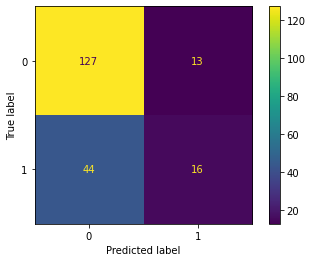

In [27]:
cm = confusion_matrix(y_test, y_predict)

cm_display = ConfusionMatrixDisplay(cm).plot()

#### SVM

In [28]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [29]:
y_predict = svc.predict(x_test)

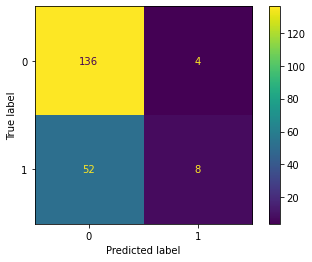

In [30]:
cm = confusion_matrix(y_test, y_predict)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [31]:
print(accuracy_score(y_test, y_predict))
print(precision_score(y_test, y_predict))
print(recall_score(y_test, y_predict))
print(f1_score(y_test, y_predict))

0.72
0.6666666666666666
0.13333333333333333
0.2222222222222222


##### Hyperparameter Tuning

In [32]:
param_grid = [{
    "C":np.logspace(-5, 8, 15),
    "kernel":['poly', 'rbf', 'sigmoid'],
    'degree':[3,4,5,6,7]
}]

grid_search = GridSearchCV(svc, param_grid, cv = 3, scoring = "accuracy", verbose = 10, refit = True)
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 225 candidates, totalling 675 fits
[CV 1/3; 1/225] START C=1e-05, degree=3, kernel=poly............................
[CV 1/3; 1/225] END ..........C=1e-05, degree=3, kernel=poly; total time=   0.0s
[CV 2/3; 1/225] START C=1e-05, degree=3, kernel=poly............................
[CV 2/3; 1/225] END ..........C=1e-05, degree=3, kernel=poly; total time=   0.0s
[CV 3/3; 1/225] START C=1e-05, degree=3, kernel=poly............................
[CV 3/3; 1/225] END ..........C=1e-05, degree=3, kernel=poly; total time=   0.0s
[CV 1/3; 2/225] START C=1e-05, degree=3, kernel=rbf.............................
[CV 1/3; 2/225] END ...........C=1e-05, degree=3, kernel=rbf; total time=   0.0s
[CV 2/3; 2/225] START C=1e-05, degree=3, kernel=rbf.............................
[CV 2/3; 2/225] END ...........C=1e-05, degree=3, kernel=rbf; total time=   0.0s
[CV 3/3; 2/225] START C=1e-05, degree=3, kernel=rbf.............................
[CV 3/3; 2/225] END ...........C=1e-05, degree

[CV 2/3; 18/225] END C=8.483428982440725e-05, degree=3, kernel=sigmoid; total time=   0.0s
[CV 3/3; 18/225] START C=8.483428982440725e-05, degree=3, kernel=sigmoid........
[CV 3/3; 18/225] END C=8.483428982440725e-05, degree=3, kernel=sigmoid; total time=   0.0s
[CV 1/3; 19/225] START C=8.483428982440725e-05, degree=4, kernel=poly...........
[CV 1/3; 19/225] END C=8.483428982440725e-05, degree=4, kernel=poly; total time=   0.0s
[CV 2/3; 19/225] START C=8.483428982440725e-05, degree=4, kernel=poly...........
[CV 2/3; 19/225] END C=8.483428982440725e-05, degree=4, kernel=poly; total time=   0.0s
[CV 3/3; 19/225] START C=8.483428982440725e-05, degree=4, kernel=poly...........
[CV 3/3; 19/225] END C=8.483428982440725e-05, degree=4, kernel=poly; total time=   0.0s
[CV 1/3; 20/225] START C=8.483428982440725e-05, degree=4, kernel=rbf............
[CV 1/3; 20/225] END C=8.483428982440725e-05, degree=4, kernel=rbf; total time=   0.0s
[CV 2/3; 20/225] START C=8.483428982440725e-05, degree=4, kern

[CV 1/3; 36/225] END C=0.0007196856730011522, degree=4, kernel=sigmoid; total time=   0.0s
[CV 2/3; 36/225] START C=0.0007196856730011522, degree=4, kernel=sigmoid........
[CV 2/3; 36/225] END C=0.0007196856730011522, degree=4, kernel=sigmoid; total time=   0.0s
[CV 3/3; 36/225] START C=0.0007196856730011522, degree=4, kernel=sigmoid........
[CV 3/3; 36/225] END C=0.0007196856730011522, degree=4, kernel=sigmoid; total time=   0.0s
[CV 1/3; 37/225] START C=0.0007196856730011522, degree=5, kernel=poly...........
[CV 1/3; 37/225] END C=0.0007196856730011522, degree=5, kernel=poly; total time=   0.0s
[CV 2/3; 37/225] START C=0.0007196856730011522, degree=5, kernel=poly...........
[CV 2/3; 37/225] END C=0.0007196856730011522, degree=5, kernel=poly; total time=   0.0s
[CV 3/3; 37/225] START C=0.0007196856730011522, degree=5, kernel=poly...........
[CV 3/3; 37/225] END C=0.0007196856730011522, degree=5, kernel=poly; total time=   0.0s
[CV 1/3; 38/225] START C=0.0007196856730011522, degree=5, 

[CV 1/3; 56/225] END C=0.006105402296585327, degree=6, kernel=rbf; total time=   0.0s
[CV 2/3; 56/225] START C=0.006105402296585327, degree=6, kernel=rbf.............
[CV 2/3; 56/225] END C=0.006105402296585327, degree=6, kernel=rbf; total time=   0.0s
[CV 3/3; 56/225] START C=0.006105402296585327, degree=6, kernel=rbf.............
[CV 3/3; 56/225] END C=0.006105402296585327, degree=6, kernel=rbf; total time=   0.0s
[CV 1/3; 57/225] START C=0.006105402296585327, degree=6, kernel=sigmoid.........
[CV 1/3; 57/225] END C=0.006105402296585327, degree=6, kernel=sigmoid; total time=   0.0s
[CV 2/3; 57/225] START C=0.006105402296585327, degree=6, kernel=sigmoid.........
[CV 2/3; 57/225] END C=0.006105402296585327, degree=6, kernel=sigmoid; total time=   0.0s
[CV 3/3; 57/225] START C=0.006105402296585327, degree=6, kernel=sigmoid.........
[CV 3/3; 57/225] END C=0.006105402296585327, degree=6, kernel=sigmoid; total time=   0.0s
[CV 1/3; 58/225] START C=0.006105402296585327, degree=7, kernel=pol

[CV 1/3; 74/225] END C=0.05179474679231213, degree=7, kernel=rbf; total time=   0.0s
[CV 2/3; 74/225] START C=0.05179474679231213, degree=7, kernel=rbf..............
[CV 2/3; 74/225] END C=0.05179474679231213, degree=7, kernel=rbf; total time=   0.0s
[CV 3/3; 74/225] START C=0.05179474679231213, degree=7, kernel=rbf..............
[CV 3/3; 74/225] END C=0.05179474679231213, degree=7, kernel=rbf; total time=   0.0s
[CV 1/3; 75/225] START C=0.05179474679231213, degree=7, kernel=sigmoid..........
[CV 1/3; 75/225] END C=0.05179474679231213, degree=7, kernel=sigmoid; total time=   0.0s
[CV 2/3; 75/225] START C=0.05179474679231213, degree=7, kernel=sigmoid..........
[CV 2/3; 75/225] END C=0.05179474679231213, degree=7, kernel=sigmoid; total time=   0.0s
[CV 3/3; 75/225] START C=0.05179474679231213, degree=7, kernel=sigmoid..........
[CV 3/3; 75/225] END C=0.05179474679231213, degree=7, kernel=sigmoid; total time=   0.0s
[CV 1/3; 76/225] START C=0.4393970560760795, degree=3, kernel=poly.......

[CV 1/3; 91/225] END C=3.727593720314938, degree=3, kernel=poly; total time=   0.0s
[CV 2/3; 91/225] START C=3.727593720314938, degree=3, kernel=poly...............
[CV 2/3; 91/225] END C=3.727593720314938, degree=3, kernel=poly; total time=   0.0s
[CV 3/3; 91/225] START C=3.727593720314938, degree=3, kernel=poly...............
[CV 3/3; 91/225] END C=3.727593720314938, degree=3, kernel=poly; total time=   0.0s
[CV 1/3; 92/225] START C=3.727593720314938, degree=3, kernel=rbf................
[CV 1/3; 92/225] END C=3.727593720314938, degree=3, kernel=rbf; total time=   0.0s
[CV 2/3; 92/225] START C=3.727593720314938, degree=3, kernel=rbf................
[CV 2/3; 92/225] END C=3.727593720314938, degree=3, kernel=rbf; total time=   0.0s
[CV 3/3; 92/225] START C=3.727593720314938, degree=3, kernel=rbf................
[CV 3/3; 92/225] END C=3.727593720314938, degree=3, kernel=rbf; total time=   0.0s
[CV 1/3; 93/225] START C=3.727593720314938, degree=3, kernel=sigmoid............
[CV 1/3; 93/2

[CV 2/3; 109/225] END C=31.622776601683793, degree=4, kernel=poly; total time=   0.0s
[CV 3/3; 109/225] START C=31.622776601683793, degree=4, kernel=poly.............
[CV 3/3; 109/225] END C=31.622776601683793, degree=4, kernel=poly; total time=   0.0s
[CV 1/3; 110/225] START C=31.622776601683793, degree=4, kernel=rbf..............
[CV 1/3; 110/225] END C=31.622776601683793, degree=4, kernel=rbf; total time=   0.0s
[CV 2/3; 110/225] START C=31.622776601683793, degree=4, kernel=rbf..............
[CV 2/3; 110/225] END C=31.622776601683793, degree=4, kernel=rbf; total time=   0.0s
[CV 3/3; 110/225] START C=31.622776601683793, degree=4, kernel=rbf..............
[CV 3/3; 110/225] END C=31.622776601683793, degree=4, kernel=rbf; total time=   0.0s
[CV 1/3; 111/225] START C=31.622776601683793, degree=4, kernel=sigmoid..........
[CV 1/3; 111/225] END C=31.622776601683793, degree=4, kernel=sigmoid; total time=   0.0s
[CV 2/3; 111/225] START C=31.622776601683793, degree=4, kernel=sigmoid.........

[CV 1/3; 127/225] END C=268.2695795279727, degree=5, kernel=poly; total time=   0.0s
[CV 2/3; 127/225] START C=268.2695795279727, degree=5, kernel=poly..............
[CV 2/3; 127/225] END C=268.2695795279727, degree=5, kernel=poly; total time=   0.0s
[CV 3/3; 127/225] START C=268.2695795279727, degree=5, kernel=poly..............
[CV 3/3; 127/225] END C=268.2695795279727, degree=5, kernel=poly; total time=   0.0s
[CV 1/3; 128/225] START C=268.2695795279727, degree=5, kernel=rbf...............
[CV 1/3; 128/225] END C=268.2695795279727, degree=5, kernel=rbf; total time=   0.0s
[CV 2/3; 128/225] START C=268.2695795279727, degree=5, kernel=rbf...............
[CV 2/3; 128/225] END C=268.2695795279727, degree=5, kernel=rbf; total time=   0.0s
[CV 3/3; 128/225] START C=268.2695795279727, degree=5, kernel=rbf...............
[CV 3/3; 128/225] END C=268.2695795279727, degree=5, kernel=rbf; total time=   0.0s
[CV 1/3; 129/225] START C=268.2695795279727, degree=5, kernel=sigmoid...........
[CV 1/3

[CV 2/3; 144/225] END C=2275.845926074791, degree=5, kernel=sigmoid; total time=   0.0s
[CV 3/3; 144/225] START C=2275.845926074791, degree=5, kernel=sigmoid...........
[CV 3/3; 144/225] END C=2275.845926074791, degree=5, kernel=sigmoid; total time=   0.0s
[CV 1/3; 145/225] START C=2275.845926074791, degree=6, kernel=poly..............
[CV 1/3; 145/225] END C=2275.845926074791, degree=6, kernel=poly; total time=   0.0s
[CV 2/3; 145/225] START C=2275.845926074791, degree=6, kernel=poly..............
[CV 2/3; 145/225] END C=2275.845926074791, degree=6, kernel=poly; total time=   0.0s
[CV 3/3; 145/225] START C=2275.845926074791, degree=6, kernel=poly..............
[CV 3/3; 145/225] END C=2275.845926074791, degree=6, kernel=poly; total time=   0.0s
[CV 1/3; 146/225] START C=2275.845926074791, degree=6, kernel=rbf...............
[CV 1/3; 146/225] END C=2275.845926074791, degree=6, kernel=rbf; total time=   0.0s
[CV 2/3; 146/225] START C=2275.845926074791, degree=6, kernel=rbf...............

[CV 1/3; 161/225] END C=19306.977288832535, degree=6, kernel=rbf; total time=   0.0s
[CV 2/3; 161/225] START C=19306.977288832535, degree=6, kernel=rbf..............
[CV 2/3; 161/225] END C=19306.977288832535, degree=6, kernel=rbf; total time=   0.0s
[CV 3/3; 161/225] START C=19306.977288832535, degree=6, kernel=rbf..............
[CV 3/3; 161/225] END C=19306.977288832535, degree=6, kernel=rbf; total time=   0.0s
[CV 1/3; 162/225] START C=19306.977288832535, degree=6, kernel=sigmoid..........
[CV 1/3; 162/225] END C=19306.977288832535, degree=6, kernel=sigmoid; total time=   0.0s
[CV 2/3; 162/225] START C=19306.977288832535, degree=6, kernel=sigmoid..........
[CV 2/3; 162/225] END C=19306.977288832535, degree=6, kernel=sigmoid; total time=   0.0s
[CV 3/3; 162/225] START C=19306.977288832535, degree=6, kernel=sigmoid..........
[CV 3/3; 162/225] END C=19306.977288832535, degree=6, kernel=sigmoid; total time=   0.0s
[CV 1/3; 163/225] START C=19306.977288832535, degree=7, kernel=poly......

[CV 2/3; 178/225] END C=163789.3706954068, degree=7, kernel=poly; total time=   0.0s
[CV 3/3; 178/225] START C=163789.3706954068, degree=7, kernel=poly..............
[CV 3/3; 178/225] END C=163789.3706954068, degree=7, kernel=poly; total time=   0.0s
[CV 1/3; 179/225] START C=163789.3706954068, degree=7, kernel=rbf...............
[CV 1/3; 179/225] END C=163789.3706954068, degree=7, kernel=rbf; total time=   0.0s
[CV 2/3; 179/225] START C=163789.3706954068, degree=7, kernel=rbf...............
[CV 2/3; 179/225] END C=163789.3706954068, degree=7, kernel=rbf; total time=   0.0s
[CV 3/3; 179/225] START C=163789.3706954068, degree=7, kernel=rbf...............
[CV 3/3; 179/225] END C=163789.3706954068, degree=7, kernel=rbf; total time=   0.0s
[CV 1/3; 180/225] START C=163789.3706954068, degree=7, kernel=sigmoid...........
[CV 1/3; 180/225] END C=163789.3706954068, degree=7, kernel=sigmoid; total time=   0.0s
[CV 2/3; 180/225] START C=163789.3706954068, degree=7, kernel=sigmoid...........
[CV 

[CV 1/3; 195/225] END C=1389495.494373136, degree=7, kernel=sigmoid; total time=   0.0s
[CV 2/3; 195/225] START C=1389495.494373136, degree=7, kernel=sigmoid...........
[CV 2/3; 195/225] END C=1389495.494373136, degree=7, kernel=sigmoid; total time=   0.0s
[CV 3/3; 195/225] START C=1389495.494373136, degree=7, kernel=sigmoid...........
[CV 3/3; 195/225] END C=1389495.494373136, degree=7, kernel=sigmoid; total time=   0.0s
[CV 1/3; 196/225] START C=11787686.347935867, degree=3, kernel=poly.............
[CV 1/3; 196/225] END C=11787686.347935867, degree=3, kernel=poly; total time=   0.0s
[CV 2/3; 196/225] START C=11787686.347935867, degree=3, kernel=poly.............
[CV 2/3; 196/225] END C=11787686.347935867, degree=3, kernel=poly; total time=   0.0s
[CV 3/3; 196/225] START C=11787686.347935867, degree=3, kernel=poly.............
[CV 3/3; 196/225] END C=11787686.347935867, degree=3, kernel=poly; total time=   0.1s
[CV 1/3; 197/225] START C=11787686.347935867, degree=3, kernel=rbf.......

[CV 3/3; 211/225] END ..C=100000000.0, degree=3, kernel=poly; total time=   0.0s
[CV 1/3; 212/225] START C=100000000.0, degree=3, kernel=rbf.....................
[CV 1/3; 212/225] END ...C=100000000.0, degree=3, kernel=rbf; total time=   0.0s
[CV 2/3; 212/225] START C=100000000.0, degree=3, kernel=rbf.....................
[CV 2/3; 212/225] END ...C=100000000.0, degree=3, kernel=rbf; total time=   0.0s
[CV 3/3; 212/225] START C=100000000.0, degree=3, kernel=rbf.....................
[CV 3/3; 212/225] END ...C=100000000.0, degree=3, kernel=rbf; total time=   0.0s
[CV 1/3; 213/225] START C=100000000.0, degree=3, kernel=sigmoid.................
[CV 1/3; 213/225] END C=100000000.0, degree=3, kernel=sigmoid; total time=   0.0s
[CV 2/3; 213/225] START C=100000000.0, degree=3, kernel=sigmoid.................
[CV 2/3; 213/225] END C=100000000.0, degree=3, kernel=sigmoid; total time=   0.0s
[CV 3/3; 213/225] START C=100000000.0, degree=3, kernel=sigmoid.................
[CV 3/3; 213/225] END C=10

GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                          'degree': [3, 4, 5, 6, 7],
                          'kernel': ['poly', 'rbf', 'sigmoid']}],
             scoring='accuracy', verbose=10)

In [33]:
final_svc = grid_search.best_estimator_
final_svc

SVC(C=0.4393970560760795, kernel='poly')

In [34]:
y_pred = grid_search.predict(x_test)

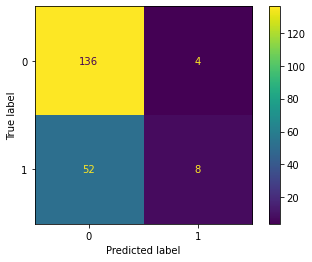

In [35]:
cm = confusion_matrix(y_test, y_predict)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [36]:
print(accuracy_score(y_test, y_predict))
print(precision_score(y_test, y_predict))
print(recall_score(y_test, y_predict))
print(f1_score(y_test, y_predict))

0.72
0.6666666666666666
0.13333333333333333
0.2222222222222222


#### Decision Tree

In [37]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [38]:
y_predict = dtc.predict(x_test)

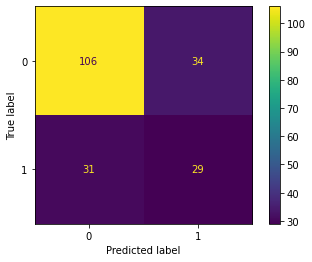

In [39]:
cm = confusion_matrix(y_test, y_predict)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [40]:
print(accuracy_score(y_test, y_predict))
print(precision_score(y_test, y_predict))
print(recall_score(y_test, y_predict))
print(f1_score(y_test, y_predict))

0.675
0.4603174603174603
0.48333333333333334
0.4715447154471545


##### Hyperparameter Tuning

In [41]:
param_grid = [{
    "criterion":['gini', 'entropy', 'log_loss'],
    "max_depth":[2,3,4,5,6,7,8,None],    
}]

grid_search = GridSearchCV(dtc, param_grid, cv = 3, scoring = "accuracy", verbose = 10, refit = True)
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3; 1/24] START criterion=gini, max_depth=2................................
[CV 1/3; 1/24] END ..............criterion=gini, max_depth=2; total time=   0.0s
[CV 2/3; 1/24] START criterion=gini, max_depth=2................................
[CV 2/3; 1/24] END ..............criterion=gini, max_depth=2; total time=   0.0s
[CV 3/3; 1/24] START criterion=gini, max_depth=2................................
[CV 3/3; 1/24] END ..............criterion=gini, max_depth=2; total time=   0.0s
[CV 1/3; 2/24] START criterion=gini, max_depth=3................................
[CV 1/3; 2/24] END ..............criterion=gini, max_depth=3; total time=   0.0s
[CV 2/3; 2/24] START criterion=gini, max_depth=3................................
[CV 2/3; 2/24] END ..............criterion=gini, max_depth=3; total time=   0.0s
[CV 3/3; 2/24] START criterion=gini, max_depth=3................................
[CV 3/3; 2/24] END ..............criterion=gini,

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [2, 3, 4, 5, 6, 7, 8, None]}],
             scoring='accuracy', verbose=10)

In [42]:
final_dtc = grid_search.best_estimator_
final_dtc

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [43]:
y_pred = grid_search.predict(x_test)

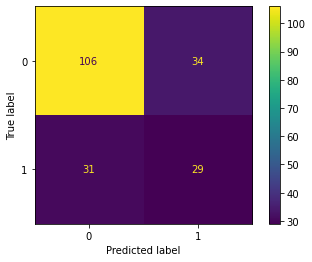

In [44]:
cm = confusion_matrix(y_test, y_predict)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [45]:
print(accuracy_score(y_test, y_predict))
print(precision_score(y_test, y_predict))
print(recall_score(y_test, y_predict))
print(f1_score(y_test, y_predict))

0.675
0.4603174603174603
0.48333333333333334
0.4715447154471545


### With CSL

### Cost Matrix = [0,3,7,0]

#### Logistic Regression

In [46]:
lr = LogisticRegression(class_weight = {0:3,1:7})
lr.fit(x_train, y_train)

LogisticRegression(class_weight={0: 3, 1: 7})

In [47]:
y_predict = lr.predict(x_test)

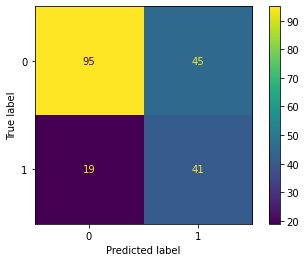

In [48]:
cm = confusion_matrix(y_test, y_predict)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [49]:
print(accuracy_score(y_test, y_predict))
print(precision_score(y_test, y_predict))
print(recall_score(y_test, y_predict))
print(f1_score(y_test, y_predict))

0.68
0.47674418604651164
0.6833333333333333
0.5616438356164384


##### Hyperparameter Tuning

In [50]:
param_grid = [{
    "penalty":["l1","l2","elasticnet"],
    "C":np.logspace(-5, 8, 15),
    'verbose':[0,1,2,3]
}]

grid_search = GridSearchCV(lr, param_grid, cv = 3, scoring = "accuracy", verbose = 10)
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits
[CV 1/3; 1/180] START C=1e-05, penalty=l1, verbose=0............................
[CV 1/3; 1/180] END ..........C=1e-05, penalty=l1, verbose=0; total time=   0.0s
[CV 2/3; 1/180] START C=1e-05, penalty=l1, verbose=0............................
[CV 2/3; 1/180] END ..........C=1e-05, penalty=l1, verbose=0; total time=   0.0s
[CV 3/3; 1/180] START C=1e-05, penalty=l1, verbose=0............................
[CV 3/3; 1/180] END ..........C=1e-05, penalty=l1, verbose=0; total time=   0.0s
[CV 1/3; 2/180] START C=1e-05, penalty=l1, verbose=1............................
[CV 1/3; 2/180] END ..........C=1e-05, penalty=l1, verbose=1; total time=   0.0s
[CV 2/3; 2/180] START C=1e-05, penalty=l1, verbose=1............................
[CV 2/3; 2/180] END ..........C=1e-05, penalty=l1, verbose=1; total time=   0.0s
[CV 3/3; 2/180] START C=1e-05, penalty=l1, verbose=1............................
[CV 3/3; 2/180] END ..........C=1e-05, penalty

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_valida

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elast

[CV 3/3; 8/180] END ..........C=1e-05, penalty=l2, verbose=3; total time=   0.0s
[CV 1/3; 9/180] START C=1e-05, penalty=elasticnet, verbose=0....................
[CV 1/3; 9/180] END ..C=1e-05, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 2/3; 9/180] START C=1e-05, penalty=elasticnet, verbose=0....................
[CV 2/3; 9/180] END ..C=1e-05, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 3/3; 9/180] START C=1e-05, penalty=elasticnet, verbose=0....................
[CV 3/3; 9/180] END ..C=1e-05, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 1/3; 10/180] START C=1e-05, penalty=elasticnet, verbose=1...................
[CV 1/3; 10/180] END .C=1e-05, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 2/3; 10/180] START C=1e-05, penalty=elasticnet, verbose=1...................
[CV 2/3; 10/180] END .C=1e-05, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 3/3; 10/180] START C=1e-05, penalty=elasticnet, verbose=1...................
[CV 3/3; 10/180] END .C=1e-0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Para

[CV 2/3; 30/180] END C=0.0007196856730011522, penalty=l2, verbose=1; total time=   0.0s
[CV 3/3; 30/180] START C=0.0007196856730011522, penalty=l2, verbose=1...........
[CV 3/3; 30/180] END C=0.0007196856730011522, penalty=l2, verbose=1; total time=   0.0s
[CV 1/3; 31/180] START C=0.0007196856730011522, penalty=l2, verbose=2...........
[CV 1/3; 31/180] END C=0.0007196856730011522, penalty=l2, verbose=2; total time=   0.0s
[CV 2/3; 31/180] START C=0.0007196856730011522, penalty=l2, verbose=2...........
[CV 2/3; 31/180] END C=0.0007196856730011522, penalty=l2, verbose=2; total time=   0.0s
[CV 3/3; 31/180] START C=0.0007196856730011522, penalty=l2, verbose=2...........
[CV 3/3; 31/180] END C=0.0007196856730011522, penalty=l2, verbose=2; total time=   0.0s
[CV 1/3; 32/180] START C=0.0007196856730011522, penalty=l2, verbose=3...........
[CV 1/3; 32/180] END C=0.0007196856730011522, penalty=l2, verbose=3; total time=   0.0s
[CV 2/3; 32/180] START C=0.0007196856730011522, penalty=l2, verbose

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Par

[CV 3/3; 44/180] END C=0.006105402296585327, penalty=l2, verbose=3; total time=   0.0s
[CV 1/3; 45/180] START C=0.006105402296585327, penalty=elasticnet, verbose=0....
[CV 1/3; 45/180] END C=0.006105402296585327, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 2/3; 45/180] START C=0.006105402296585327, penalty=elasticnet, verbose=0....
[CV 2/3; 45/180] END C=0.006105402296585327, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 3/3; 45/180] START C=0.006105402296585327, penalty=elasticnet, verbose=0....
[CV 3/3; 45/180] END C=0.006105402296585327, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 1/3; 46/180] START C=0.006105402296585327, penalty=elasticnet, verbose=1....
[CV 1/3; 46/180] END C=0.006105402296585327, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 2/3; 46/180] START C=0.006105402296585327, penalty=elasticnet, verbose=1....
[CV 2/3; 46/180] END C=0.006105402296585327, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 3/3; 46/180] START C=0.006105

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validatio

[CV 3/3; 55/180] END C=0.05179474679231213, penalty=l2, verbose=2; total time=   0.0s
[CV 1/3; 56/180] START C=0.05179474679231213, penalty=l2, verbose=3.............
[CV 1/3; 56/180] END C=0.05179474679231213, penalty=l2, verbose=3; total time=   0.0s
[CV 2/3; 56/180] START C=0.05179474679231213, penalty=l2, verbose=3.............
[CV 2/3; 56/180] END C=0.05179474679231213, penalty=l2, verbose=3; total time=   0.0s
[CV 3/3; 56/180] START C=0.05179474679231213, penalty=l2, verbose=3.............
[CV 3/3; 56/180] END C=0.05179474679231213, penalty=l2, verbose=3; total time=   0.0s
[CV 1/3; 57/180] START C=0.05179474679231213, penalty=elasticnet, verbose=0.....
[CV 1/3; 57/180] END C=0.05179474679231213, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 2/3; 57/180] START C=0.05179474679231213, penalty=elasticnet, verbose=0.....
[CV 2/3; 57/180] END C=0.05179474679231213, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 3/3; 57/180] START C=0.05179474679231213, penalty=elasticne

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection

[CV 1/3; 63/180] END C=0.4393970560760795, penalty=l1, verbose=2; total time=   0.0s
[CV 2/3; 63/180] START C=0.4393970560760795, penalty=l1, verbose=2..............
[CV 2/3; 63/180] END C=0.4393970560760795, penalty=l1, verbose=2; total time=   0.0s
[CV 3/3; 63/180] START C=0.4393970560760795, penalty=l1, verbose=2..............
[CV 3/3; 63/180] END C=0.4393970560760795, penalty=l1, verbose=2; total time=   0.0s
[CV 1/3; 64/180] START C=0.4393970560760795, penalty=l1, verbose=3..............
[CV 1/3; 64/180] END C=0.4393970560760795, penalty=l1, verbose=3; total time=   0.0s
[CV 2/3; 64/180] START C=0.4393970560760795, penalty=l1, verbose=3..............
[CV 2/3; 64/180] END C=0.4393970560760795, penalty=l1, verbose=3; total time=   0.0s
[CV 3/3; 64/180] START C=0.4393970560760795, penalty=l1, verbose=3..............
[CV 3/3; 64/180] END C=0.4393970560760795, penalty=l1, verbose=3; total time=   0.0s
[CV 1/3; 65/180] START C=0.4393970560760795, penalty=l2, verbose=0..............
[CV 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validatio

[CV 3/3; 67/180] END C=0.4393970560760795, penalty=l2, verbose=2; total time=   0.0s
[CV 1/3; 68/180] START C=0.4393970560760795, penalty=l2, verbose=3..............
[CV 1/3; 68/180] END C=0.4393970560760795, penalty=l2, verbose=3; total time=   0.0s
[CV 2/3; 68/180] START C=0.4393970560760795, penalty=l2, verbose=3..............
[CV 2/3; 68/180] END C=0.4393970560760795, penalty=l2, verbose=3; total time=   0.0s
[CV 3/3; 68/180] START C=0.4393970560760795, penalty=l2, verbose=3..............
[CV 3/3; 68/180] END C=0.4393970560760795, penalty=l2, verbose=3; total time=   0.0s
[CV 1/3; 69/180] START C=0.4393970560760795, penalty=elasticnet, verbose=0......
[CV 1/3; 69/180] END C=0.4393970560760795, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 2/3; 69/180] START C=0.4393970560760795, penalty=elasticnet, verbose=0......
[CV 2/3; 69/180] END C=0.4393970560760795, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 3/3; 69/180] START C=0.4393970560760795, penalty=elasticnet, verb

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Par

[CV 1/3; 78/180] END C=3.727593720314938, penalty=l2, verbose=1; total time=   0.0s
[CV 2/3; 78/180] START C=3.727593720314938, penalty=l2, verbose=1...............
[CV 2/3; 78/180] END C=3.727593720314938, penalty=l2, verbose=1; total time=   0.0s
[CV 3/3; 78/180] START C=3.727593720314938, penalty=l2, verbose=1...............
[CV 3/3; 78/180] END C=3.727593720314938, penalty=l2, verbose=1; total time=   0.0s
[CV 1/3; 79/180] START C=3.727593720314938, penalty=l2, verbose=2...............
[CV 1/3; 79/180] END C=3.727593720314938, penalty=l2, verbose=2; total time=   0.0s
[CV 2/3; 79/180] START C=3.727593720314938, penalty=l2, verbose=2...............
[CV 2/3; 79/180] END C=3.727593720314938, penalty=l2, verbose=2; total time=   0.0s
[CV 3/3; 79/180] START C=3.727593720314938, penalty=l2, verbose=2...............
[CV 3/3; 79/180] END C=3.727593720314938, penalty=l2, verbose=2; total time=   0.0s
[CV 1/3; 80/180] START C=3.727593720314938, penalty=l2, verbose=3...............
[CV 1/3; 8

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalt

[CV 3/3; 80/180] END C=3.727593720314938, penalty=l2, verbose=3; total time=   0.0s
[CV 1/3; 81/180] START C=3.727593720314938, penalty=elasticnet, verbose=0.......
[CV 1/3; 81/180] END C=3.727593720314938, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 2/3; 81/180] START C=3.727593720314938, penalty=elasticnet, verbose=0.......
[CV 2/3; 81/180] END C=3.727593720314938, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 3/3; 81/180] START C=3.727593720314938, penalty=elasticnet, verbose=0.......
[CV 3/3; 81/180] END C=3.727593720314938, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 1/3; 82/180] START C=3.727593720314938, penalty=elasticnet, verbose=1.......
[CV 1/3; 82/180] END C=3.727593720314938, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 2/3; 82/180] START C=3.727593720314938, penalty=elasticnet, verbose=1.......
[CV 2/3; 82/180] END C=3.727593720314938, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 3/3; 82/180] START C=3.727593720314938, penalty

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Para

[CV 1/3; 91/180] END C=31.622776601683793, penalty=l2, verbose=2; total time=   0.0s
[CV 2/3; 91/180] START C=31.622776601683793, penalty=l2, verbose=2..............
[CV 2/3; 91/180] END C=31.622776601683793, penalty=l2, verbose=2; total time=   0.0s
[CV 3/3; 91/180] START C=31.622776601683793, penalty=l2, verbose=2..............
[CV 3/3; 91/180] END C=31.622776601683793, penalty=l2, verbose=2; total time=   0.0s
[CV 1/3; 92/180] START C=31.622776601683793, penalty=l2, verbose=3..............
[CV 1/3; 92/180] END C=31.622776601683793, penalty=l2, verbose=3; total time=   0.0s
[CV 2/3; 92/180] START C=31.622776601683793, penalty=l2, verbose=3..............
[CV 2/3; 92/180] END C=31.622776601683793, penalty=l2, verbose=3; total time=   0.0s
[CV 3/3; 92/180] START C=31.622776601683793, penalty=l2, verbose=3..............
[CV 3/3; 92/180] END C=31.622776601683793, penalty=l2, verbose=3; total time=   0.0s
[CV 1/3; 93/180] START C=31.622776601683793, penalty=elasticnet, verbose=0......
[CV 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _

[CV 2/3; 95/180] START C=31.622776601683793, penalty=elasticnet, verbose=2......
[CV 2/3; 95/180] END C=31.622776601683793, penalty=elasticnet, verbose=2; total time=   0.0s
[CV 3/3; 95/180] START C=31.622776601683793, penalty=elasticnet, verbose=2......
[CV 3/3; 95/180] END C=31.622776601683793, penalty=elasticnet, verbose=2; total time=   0.0s
[CV 1/3; 96/180] START C=31.622776601683793, penalty=elasticnet, verbose=3......
[CV 1/3; 96/180] END C=31.622776601683793, penalty=elasticnet, verbose=3; total time=   0.0s
[CV 2/3; 96/180] START C=31.622776601683793, penalty=elasticnet, verbose=3......
[CV 2/3; 96/180] END C=31.622776601683793, penalty=elasticnet, verbose=3; total time=   0.0s
[CV 3/3; 96/180] START C=31.622776601683793, penalty=elasticnet, verbose=3......
[CV 3/3; 96/180] END C=31.622776601683793, penalty=elasticnet, verbose=3; total time=   0.0s
[CV 1/3; 97/180] START C=268.2695795279727, penalty=l1, verbose=0...............
[CV 1/3; 97/180] END C=268.2695795279727, penalty

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Para

[CV 1/3; 103/180] END C=268.2695795279727, penalty=l2, verbose=2; total time=   0.0s
[CV 2/3; 103/180] START C=268.2695795279727, penalty=l2, verbose=2..............
[CV 2/3; 103/180] END C=268.2695795279727, penalty=l2, verbose=2; total time=   0.0s
[CV 3/3; 103/180] START C=268.2695795279727, penalty=l2, verbose=2..............
[CV 3/3; 103/180] END C=268.2695795279727, penalty=l2, verbose=2; total time=   0.0s
[CV 1/3; 104/180] START C=268.2695795279727, penalty=l2, verbose=3..............
[CV 1/3; 104/180] END C=268.2695795279727, penalty=l2, verbose=3; total time=   0.0s
[CV 2/3; 104/180] START C=268.2695795279727, penalty=l2, verbose=3..............
[CV 2/3; 104/180] END C=268.2695795279727, penalty=l2, verbose=3; total time=   0.0s
[CV 3/3; 104/180] START C=268.2695795279727, penalty=l2, verbose=3..............
[CV 3/3; 104/180] END C=268.2695795279727, penalty=l2, verbose=3; total time=   0.0s
[CV 1/3; 105/180] START C=268.2695795279727, penalty=elasticnet, verbose=0......
[CV 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalt

[CV 2/3; 107/180] END C=268.2695795279727, penalty=elasticnet, verbose=2; total time=   0.0s
[CV 3/3; 107/180] START C=268.2695795279727, penalty=elasticnet, verbose=2......
[CV 3/3; 107/180] END C=268.2695795279727, penalty=elasticnet, verbose=2; total time=   0.0s
[CV 1/3; 108/180] START C=268.2695795279727, penalty=elasticnet, verbose=3......
[CV 1/3; 108/180] END C=268.2695795279727, penalty=elasticnet, verbose=3; total time=   0.0s
[CV 2/3; 108/180] START C=268.2695795279727, penalty=elasticnet, verbose=3......
[CV 2/3; 108/180] END C=268.2695795279727, penalty=elasticnet, verbose=3; total time=   0.0s
[CV 3/3; 108/180] START C=268.2695795279727, penalty=elasticnet, verbose=3......
[CV 3/3; 108/180] END C=268.2695795279727, penalty=elasticnet, verbose=3; total time=   0.0s
[CV 1/3; 109/180] START C=2275.845926074791, penalty=l1, verbose=0..............
[CV 1/3; 109/180] END C=2275.845926074791, penalty=l1, verbose=0; total time=   0.0s
[CV 2/3; 109/180] START C=2275.845926074791, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    

[CV 1/3; 115/180] END C=2275.845926074791, penalty=l2, verbose=2; total time=   0.0s
[CV 2/3; 115/180] START C=2275.845926074791, penalty=l2, verbose=2..............
[CV 2/3; 115/180] END C=2275.845926074791, penalty=l2, verbose=2; total time=   0.0s
[CV 3/3; 115/180] START C=2275.845926074791, penalty=l2, verbose=2..............
[CV 3/3; 115/180] END C=2275.845926074791, penalty=l2, verbose=2; total time=   0.0s
[CV 1/3; 116/180] START C=2275.845926074791, penalty=l2, verbose=3..............
[CV 1/3; 116/180] END C=2275.845926074791, penalty=l2, verbose=3; total time=   0.0s
[CV 2/3; 116/180] START C=2275.845926074791, penalty=l2, verbose=3..............
[CV 2/3; 116/180] END C=2275.845926074791, penalty=l2, verbose=3; total time=   0.0s
[CV 3/3; 116/180] START C=2275.845926074791, penalty=l2, verbose=3..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elast

[CV 3/3; 116/180] END C=2275.845926074791, penalty=l2, verbose=3; total time=   0.0s
[CV 1/3; 117/180] START C=2275.845926074791, penalty=elasticnet, verbose=0......
[CV 1/3; 117/180] END C=2275.845926074791, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 2/3; 117/180] START C=2275.845926074791, penalty=elasticnet, verbose=0......
[CV 2/3; 117/180] END C=2275.845926074791, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 3/3; 117/180] START C=2275.845926074791, penalty=elasticnet, verbose=0......
[CV 3/3; 117/180] END C=2275.845926074791, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 1/3; 118/180] START C=2275.845926074791, penalty=elasticnet, verbose=1......
[CV 1/3; 118/180] END C=2275.845926074791, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 2/3; 118/180] START C=2275.845926074791, penalty=elasticnet, verbose=1......
[CV 2/3; 118/180] END C=2275.845926074791, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 3/3; 118/180] START C=2275.845926074791, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

[CV 2/3; 130/180] END C=19306.977288832535, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 3/3; 130/180] START C=19306.977288832535, penalty=elasticnet, verbose=1.....
[CV 3/3; 130/180] END C=19306.977288832535, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 1/3; 131/180] START C=19306.977288832535, penalty=elasticnet, verbose=2.....
[CV 1/3; 131/180] END C=19306.977288832535, penalty=elasticnet, verbose=2; total time=   0.0s
[CV 2/3; 131/180] START C=19306.977288832535, penalty=elasticnet, verbose=2.....
[CV 2/3; 131/180] END C=19306.977288832535, penalty=elasticnet, verbose=2; total time=   0.0s
[CV 3/3; 131/180] START C=19306.977288832535, penalty=elasticnet, verbose=2.....
[CV 3/3; 131/180] END C=19306.977288832535, penalty=elasticnet, verbose=2; total time=   0.0s
[CV 1/3; 132/180] START C=19306.977288832535, penalty=elasticnet, verbose=3.....
[CV 1/3; 132/180] END C=19306.977288832535, penalty=elasticnet, verbose=3; total time=   0.0s
[CV 2/3; 132/180] START C=19306

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection

[CV 1/3; 138/180] END C=163789.3706954068, penalty=l2, verbose=1; total time=   0.0s
[CV 2/3; 138/180] START C=163789.3706954068, penalty=l2, verbose=1..............
[CV 2/3; 138/180] END C=163789.3706954068, penalty=l2, verbose=1; total time=   0.0s
[CV 3/3; 138/180] START C=163789.3706954068, penalty=l2, verbose=1..............
[CV 3/3; 138/180] END C=163789.3706954068, penalty=l2, verbose=1; total time=   0.0s
[CV 1/3; 139/180] START C=163789.3706954068, penalty=l2, verbose=2..............
[CV 1/3; 139/180] END C=163789.3706954068, penalty=l2, verbose=2; total time=   0.0s
[CV 2/3; 139/180] START C=163789.3706954068, penalty=l2, verbose=2..............
[CV 2/3; 139/180] END C=163789.3706954068, penalty=l2, verbose=2; total time=   0.0s
[CV 3/3; 139/180] START C=163789.3706954068, penalty=l2, verbose=2..............
[CV 3/3; 139/180] END C=163789.3706954068, penalty=l2, verbose=2; total time=   0.0s
[CV 1/3; 140/180] START C=163789.3706954068, penalty=l2, verbose=3..............
[CV 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Para

[CV 3/3; 140/180] END C=163789.3706954068, penalty=l2, verbose=3; total time=   0.0s
[CV 1/3; 141/180] START C=163789.3706954068, penalty=elasticnet, verbose=0......
[CV 1/3; 141/180] END C=163789.3706954068, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 2/3; 141/180] START C=163789.3706954068, penalty=elasticnet, verbose=0......
[CV 2/3; 141/180] END C=163789.3706954068, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 3/3; 141/180] START C=163789.3706954068, penalty=elasticnet, verbose=0......
[CV 3/3; 141/180] END C=163789.3706954068, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 1/3; 142/180] START C=163789.3706954068, penalty=elasticnet, verbose=1......
[CV 1/3; 142/180] END C=163789.3706954068, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 2/3; 142/180] START C=163789.3706954068, penalty=elasticnet, verbose=1......
[CV 2/3; 142/180] END C=163789.3706954068, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 3/3; 142/180] START C=163789.3706954068, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

[CV 1/3; 151/180] END C=1389495.494373136, penalty=l2, verbose=2; total time=   0.0s
[CV 2/3; 151/180] START C=1389495.494373136, penalty=l2, verbose=2..............
[CV 2/3; 151/180] END C=1389495.494373136, penalty=l2, verbose=2; total time=   0.0s
[CV 3/3; 151/180] START C=1389495.494373136, penalty=l2, verbose=2..............
[CV 3/3; 151/180] END C=1389495.494373136, penalty=l2, verbose=2; total time=   0.0s
[CV 1/3; 152/180] START C=1389495.494373136, penalty=l2, verbose=3..............
[CV 1/3; 152/180] END C=1389495.494373136, penalty=l2, verbose=3; total time=   0.0s
[CV 2/3; 152/180] START C=1389495.494373136, penalty=l2, verbose=3..............
[CV 2/3; 152/180] END C=1389495.494373136, penalty=l2, verbose=3; total time=   0.0s
[CV 3/3; 152/180] START C=1389495.494373136, penalty=l2, verbose=3..............
[CV 3/3; 152/180] END C=1389495.494373136, penalty=l2, verbose=3; total time=   0.0s
[CV 1/3; 153/180] START C=1389495.494373136, penalty=elasticnet, verbose=0......


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection

[CV 1/3; 153/180] END C=1389495.494373136, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 2/3; 153/180] START C=1389495.494373136, penalty=elasticnet, verbose=0......
[CV 2/3; 153/180] END C=1389495.494373136, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 3/3; 153/180] START C=1389495.494373136, penalty=elasticnet, verbose=0......
[CV 3/3; 153/180] END C=1389495.494373136, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 1/3; 154/180] START C=1389495.494373136, penalty=elasticnet, verbose=1......
[CV 1/3; 154/180] END C=1389495.494373136, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 2/3; 154/180] START C=1389495.494373136, penalty=elasticnet, verbose=1......
[CV 2/3; 154/180] END C=1389495.494373136, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 3/3; 154/180] START C=1389495.494373136, penalty=elasticnet, verbose=1......
[CV 3/3; 154/180] END C=1389495.494373136, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 1/3; 155/180] START C=1389495.494

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

[CV 3/3; 164/180] END C=11787686.347935867, penalty=l2, verbose=3; total time=   0.0s
[CV 1/3; 165/180] START C=11787686.347935867, penalty=elasticnet, verbose=0.....
[CV 1/3; 165/180] END C=11787686.347935867, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 2/3; 165/180] START C=11787686.347935867, penalty=elasticnet, verbose=0.....
[CV 2/3; 165/180] END C=11787686.347935867, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 3/3; 165/180] START C=11787686.347935867, penalty=elasticnet, verbose=0.....
[CV 3/3; 165/180] END C=11787686.347935867, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 1/3; 166/180] START C=11787686.347935867, penalty=elasticnet, verbose=1.....
[CV 1/3; 166/180] END C=11787686.347935867, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 2/3; 166/180] START C=11787686.347935867, penalty=elasticnet, verbose=1.....
[CV 2/3; 166/180] END C=11787686.347935867, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 3/3; 166/180] START C=11787686.3479

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


[CV 3/3; 176/180] END ..C=100000000.0, penalty=l2, verbose=3; total time=   0.0s
[CV 1/3; 177/180] START C=100000000.0, penalty=elasticnet, verbose=0............
[CV 1/3; 177/180] END C=100000000.0, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 2/3; 177/180] START C=100000000.0, penalty=elasticnet, verbose=0............
[CV 2/3; 177/180] END C=100000000.0, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 3/3; 177/180] START C=100000000.0, penalty=elasticnet, verbose=0............
[CV 3/3; 177/180] END C=100000000.0, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 1/3; 178/180] START C=100000000.0, penalty=elasticnet, verbose=1............
[CV 1/3; 178/180] END C=100000000.0, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 2/3; 178/180] START C=100000000.0, penalty=elasticnet, verbose=1............
[CV 2/3; 178/180] END C=100000000.0, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 3/3; 178/180] START C=100000000.0, penalty=elasticnet, verbose=1...........

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection

GridSearchCV(cv=3, estimator=LogisticRegression(class_weight={0: 3, 1: 7}),
             param_grid=[{'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                          'penalty': ['l1', 'l2', 'elasticnet'],
                          'verbose': [0, 1, 2, 3]}],
             scoring='accuracy', verbose=10)

In [51]:
final_lr = grid_search.best_estimator_
final_lr

LogisticRegression(C=31.622776601683793, class_weight={0: 3, 1: 7})

In [52]:
y_predict = final_lr.predict(x_test)

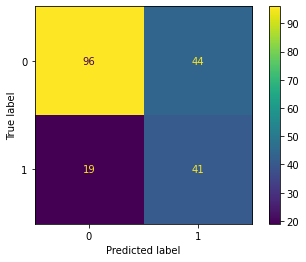

In [53]:
cm = confusion_matrix(y_test, y_predict)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [54]:
print(accuracy_score(y_test, y_predict))
print(precision_score(y_test, y_predict))
print(recall_score(y_test, y_predict))
print(f1_score(y_test, y_predict))

0.685
0.4823529411764706
0.6833333333333333
0.5655172413793104


#### SVM

In [55]:
svc = SVC(class_weight = {0:3,1:7})
svc.fit(x_train, y_train)

SVC(class_weight={0: 3, 1: 7})

In [56]:
y_predict = svc.predict(x_test)

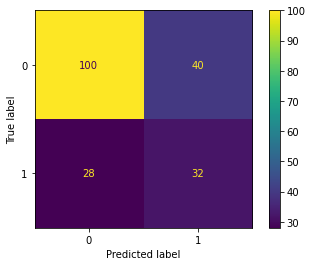

In [57]:
cm = confusion_matrix(y_test, y_predict)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [58]:
print(accuracy_score(y_test, y_predict))
print(precision_score(y_test, y_predict))
print(recall_score(y_test, y_predict))
print(f1_score(y_test, y_predict))

0.66
0.4444444444444444
0.5333333333333333
0.4848484848484848


##### Hyperparameter Tuning

In [59]:
param_grid = [{
    "C":np.logspace(-5, 8, 15),
    "kernel":['poly', 'rbf', 'sigmoid'],
    'degree':[3,4,5,6,7]
}]

grid_search = GridSearchCV(svc, param_grid, cv = 3, scoring = "accuracy", verbose = 10, refit = True)
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 225 candidates, totalling 675 fits
[CV 1/3; 1/225] START C=1e-05, degree=3, kernel=poly............................
[CV 1/3; 1/225] END ..........C=1e-05, degree=3, kernel=poly; total time=   0.0s
[CV 2/3; 1/225] START C=1e-05, degree=3, kernel=poly............................
[CV 2/3; 1/225] END ..........C=1e-05, degree=3, kernel=poly; total time=   0.0s
[CV 3/3; 1/225] START C=1e-05, degree=3, kernel=poly............................
[CV 3/3; 1/225] END ..........C=1e-05, degree=3, kernel=poly; total time=   0.0s
[CV 1/3; 2/225] START C=1e-05, degree=3, kernel=rbf.............................
[CV 1/3; 2/225] END ...........C=1e-05, degree=3, kernel=rbf; total time=   0.0s
[CV 2/3; 2/225] START C=1e-05, degree=3, kernel=rbf.............................
[CV 2/3; 2/225] END ...........C=1e-05, degree=3, kernel=rbf; total time=   0.0s
[CV 3/3; 2/225] START C=1e-05, degree=3, kernel=rbf.............................
[CV 3/3; 2/225] END ...........C=1e-05, degree

[CV 2/3; 18/225] END C=8.483428982440725e-05, degree=3, kernel=sigmoid; total time=   0.0s
[CV 3/3; 18/225] START C=8.483428982440725e-05, degree=3, kernel=sigmoid........
[CV 3/3; 18/225] END C=8.483428982440725e-05, degree=3, kernel=sigmoid; total time=   0.0s
[CV 1/3; 19/225] START C=8.483428982440725e-05, degree=4, kernel=poly...........
[CV 1/3; 19/225] END C=8.483428982440725e-05, degree=4, kernel=poly; total time=   0.0s
[CV 2/3; 19/225] START C=8.483428982440725e-05, degree=4, kernel=poly...........
[CV 2/3; 19/225] END C=8.483428982440725e-05, degree=4, kernel=poly; total time=   0.0s
[CV 3/3; 19/225] START C=8.483428982440725e-05, degree=4, kernel=poly...........
[CV 3/3; 19/225] END C=8.483428982440725e-05, degree=4, kernel=poly; total time=   0.0s
[CV 1/3; 20/225] START C=8.483428982440725e-05, degree=4, kernel=rbf............
[CV 1/3; 20/225] END C=8.483428982440725e-05, degree=4, kernel=rbf; total time=   0.0s
[CV 2/3; 20/225] START C=8.483428982440725e-05, degree=4, kern

[CV 3/3; 34/225] END C=0.0007196856730011522, degree=4, kernel=poly; total time=   0.0s
[CV 1/3; 35/225] START C=0.0007196856730011522, degree=4, kernel=rbf............
[CV 1/3; 35/225] END C=0.0007196856730011522, degree=4, kernel=rbf; total time=   0.0s
[CV 2/3; 35/225] START C=0.0007196856730011522, degree=4, kernel=rbf............
[CV 2/3; 35/225] END C=0.0007196856730011522, degree=4, kernel=rbf; total time=   0.0s
[CV 3/3; 35/225] START C=0.0007196856730011522, degree=4, kernel=rbf............
[CV 3/3; 35/225] END C=0.0007196856730011522, degree=4, kernel=rbf; total time=   0.0s
[CV 1/3; 36/225] START C=0.0007196856730011522, degree=4, kernel=sigmoid........
[CV 1/3; 36/225] END C=0.0007196856730011522, degree=4, kernel=sigmoid; total time=   0.0s
[CV 2/3; 36/225] START C=0.0007196856730011522, degree=4, kernel=sigmoid........
[CV 2/3; 36/225] END C=0.0007196856730011522, degree=4, kernel=sigmoid; total time=   0.0s
[CV 3/3; 36/225] START C=0.0007196856730011522, degree=4, kernel

[CV 3/3; 51/225] END C=0.006105402296585327, degree=4, kernel=sigmoid; total time=   0.0s
[CV 1/3; 52/225] START C=0.006105402296585327, degree=5, kernel=poly............
[CV 1/3; 52/225] END C=0.006105402296585327, degree=5, kernel=poly; total time=   0.0s
[CV 2/3; 52/225] START C=0.006105402296585327, degree=5, kernel=poly............
[CV 2/3; 52/225] END C=0.006105402296585327, degree=5, kernel=poly; total time=   0.0s
[CV 3/3; 52/225] START C=0.006105402296585327, degree=5, kernel=poly............
[CV 3/3; 52/225] END C=0.006105402296585327, degree=5, kernel=poly; total time=   0.0s
[CV 1/3; 53/225] START C=0.006105402296585327, degree=5, kernel=rbf.............
[CV 1/3; 53/225] END C=0.006105402296585327, degree=5, kernel=rbf; total time=   0.0s
[CV 2/3; 53/225] START C=0.006105402296585327, degree=5, kernel=rbf.............
[CV 2/3; 53/225] END C=0.006105402296585327, degree=5, kernel=rbf; total time=   0.0s
[CV 3/3; 53/225] START C=0.006105402296585327, degree=5, kernel=rbf.....

[CV 1/3; 69/225] START C=0.05179474679231213, degree=5, kernel=sigmoid..........
[CV 1/3; 69/225] END C=0.05179474679231213, degree=5, kernel=sigmoid; total time=   0.0s
[CV 2/3; 69/225] START C=0.05179474679231213, degree=5, kernel=sigmoid..........
[CV 2/3; 69/225] END C=0.05179474679231213, degree=5, kernel=sigmoid; total time=   0.0s
[CV 3/3; 69/225] START C=0.05179474679231213, degree=5, kernel=sigmoid..........
[CV 3/3; 69/225] END C=0.05179474679231213, degree=5, kernel=sigmoid; total time=   0.0s
[CV 1/3; 70/225] START C=0.05179474679231213, degree=6, kernel=poly.............
[CV 1/3; 70/225] END C=0.05179474679231213, degree=6, kernel=poly; total time=   0.0s
[CV 2/3; 70/225] START C=0.05179474679231213, degree=6, kernel=poly.............
[CV 2/3; 70/225] END C=0.05179474679231213, degree=6, kernel=poly; total time=   0.0s
[CV 3/3; 70/225] START C=0.05179474679231213, degree=6, kernel=poly.............
[CV 3/3; 70/225] END C=0.05179474679231213, degree=6, kernel=poly; total ti

[CV 2/3; 85/225] END C=0.4393970560760795, degree=6, kernel=poly; total time=   0.0s
[CV 3/3; 85/225] START C=0.4393970560760795, degree=6, kernel=poly..............
[CV 3/3; 85/225] END C=0.4393970560760795, degree=6, kernel=poly; total time=   0.0s
[CV 1/3; 86/225] START C=0.4393970560760795, degree=6, kernel=rbf...............
[CV 1/3; 86/225] END C=0.4393970560760795, degree=6, kernel=rbf; total time=   0.0s
[CV 2/3; 86/225] START C=0.4393970560760795, degree=6, kernel=rbf...............
[CV 2/3; 86/225] END C=0.4393970560760795, degree=6, kernel=rbf; total time=   0.0s
[CV 3/3; 86/225] START C=0.4393970560760795, degree=6, kernel=rbf...............
[CV 3/3; 86/225] END C=0.4393970560760795, degree=6, kernel=rbf; total time=   0.0s
[CV 1/3; 87/225] START C=0.4393970560760795, degree=6, kernel=sigmoid...........
[CV 1/3; 87/225] END C=0.4393970560760795, degree=6, kernel=sigmoid; total time=   0.0s
[CV 2/3; 87/225] START C=0.4393970560760795, degree=6, kernel=sigmoid...........
[CV 

[CV 1/3; 102/225] END C=3.727593720314938, degree=6, kernel=sigmoid; total time=   0.0s
[CV 2/3; 102/225] START C=3.727593720314938, degree=6, kernel=sigmoid...........
[CV 2/3; 102/225] END C=3.727593720314938, degree=6, kernel=sigmoid; total time=   0.0s
[CV 3/3; 102/225] START C=3.727593720314938, degree=6, kernel=sigmoid...........
[CV 3/3; 102/225] END C=3.727593720314938, degree=6, kernel=sigmoid; total time=   0.0s
[CV 1/3; 103/225] START C=3.727593720314938, degree=7, kernel=poly..............
[CV 1/3; 103/225] END C=3.727593720314938, degree=7, kernel=poly; total time=   0.0s
[CV 2/3; 103/225] START C=3.727593720314938, degree=7, kernel=poly..............
[CV 2/3; 103/225] END C=3.727593720314938, degree=7, kernel=poly; total time=   0.0s
[CV 3/3; 103/225] START C=3.727593720314938, degree=7, kernel=poly..............
[CV 3/3; 103/225] END C=3.727593720314938, degree=7, kernel=poly; total time=   0.0s
[CV 1/3; 104/225] START C=3.727593720314938, degree=7, kernel=rbf...........

[CV 2/3; 119/225] END C=31.622776601683793, degree=7, kernel=rbf; total time=   0.0s
[CV 3/3; 119/225] START C=31.622776601683793, degree=7, kernel=rbf..............
[CV 3/3; 119/225] END C=31.622776601683793, degree=7, kernel=rbf; total time=   0.0s
[CV 1/3; 120/225] START C=31.622776601683793, degree=7, kernel=sigmoid..........
[CV 1/3; 120/225] END C=31.622776601683793, degree=7, kernel=sigmoid; total time=   0.0s
[CV 2/3; 120/225] START C=31.622776601683793, degree=7, kernel=sigmoid..........
[CV 2/3; 120/225] END C=31.622776601683793, degree=7, kernel=sigmoid; total time=   0.0s
[CV 3/3; 120/225] START C=31.622776601683793, degree=7, kernel=sigmoid..........
[CV 3/3; 120/225] END C=31.622776601683793, degree=7, kernel=sigmoid; total time=   0.0s
[CV 1/3; 121/225] START C=268.2695795279727, degree=3, kernel=poly..............
[CV 1/3; 121/225] END C=268.2695795279727, degree=3, kernel=poly; total time=   0.0s
[CV 2/3; 121/225] START C=268.2695795279727, degree=3, kernel=poly.......

[CV 3/3; 136/225] END C=2275.845926074791, degree=3, kernel=poly; total time=   0.0s
[CV 1/3; 137/225] START C=2275.845926074791, degree=3, kernel=rbf...............
[CV 1/3; 137/225] END C=2275.845926074791, degree=3, kernel=rbf; total time=   0.0s
[CV 2/3; 137/225] START C=2275.845926074791, degree=3, kernel=rbf...............
[CV 2/3; 137/225] END C=2275.845926074791, degree=3, kernel=rbf; total time=   0.0s
[CV 3/3; 137/225] START C=2275.845926074791, degree=3, kernel=rbf...............
[CV 3/3; 137/225] END C=2275.845926074791, degree=3, kernel=rbf; total time=   0.0s
[CV 1/3; 138/225] START C=2275.845926074791, degree=3, kernel=sigmoid...........
[CV 1/3; 138/225] END C=2275.845926074791, degree=3, kernel=sigmoid; total time=   0.0s
[CV 2/3; 138/225] START C=2275.845926074791, degree=3, kernel=sigmoid...........
[CV 2/3; 138/225] END C=2275.845926074791, degree=3, kernel=sigmoid; total time=   0.0s
[CV 3/3; 138/225] START C=2275.845926074791, degree=3, kernel=sigmoid...........
[

[CV 2/3; 154/225] END C=19306.977288832535, degree=4, kernel=poly; total time=   0.0s
[CV 3/3; 154/225] START C=19306.977288832535, degree=4, kernel=poly.............
[CV 3/3; 154/225] END C=19306.977288832535, degree=4, kernel=poly; total time=   0.0s
[CV 1/3; 155/225] START C=19306.977288832535, degree=4, kernel=rbf..............
[CV 1/3; 155/225] END C=19306.977288832535, degree=4, kernel=rbf; total time=   0.0s
[CV 2/3; 155/225] START C=19306.977288832535, degree=4, kernel=rbf..............
[CV 2/3; 155/225] END C=19306.977288832535, degree=4, kernel=rbf; total time=   0.0s
[CV 3/3; 155/225] START C=19306.977288832535, degree=4, kernel=rbf..............
[CV 3/3; 155/225] END C=19306.977288832535, degree=4, kernel=rbf; total time=   0.0s
[CV 1/3; 156/225] START C=19306.977288832535, degree=4, kernel=sigmoid..........
[CV 1/3; 156/225] END C=19306.977288832535, degree=4, kernel=sigmoid; total time=   0.0s
[CV 2/3; 156/225] START C=19306.977288832535, degree=4, kernel=sigmoid.........

[CV 2/3; 171/225] END C=163789.3706954068, degree=4, kernel=sigmoid; total time=   0.0s
[CV 3/3; 171/225] START C=163789.3706954068, degree=4, kernel=sigmoid...........
[CV 3/3; 171/225] END C=163789.3706954068, degree=4, kernel=sigmoid; total time=   0.0s
[CV 1/3; 172/225] START C=163789.3706954068, degree=5, kernel=poly..............
[CV 1/3; 172/225] END C=163789.3706954068, degree=5, kernel=poly; total time=   0.0s
[CV 2/3; 172/225] START C=163789.3706954068, degree=5, kernel=poly..............
[CV 2/3; 172/225] END C=163789.3706954068, degree=5, kernel=poly; total time=   0.0s
[CV 3/3; 172/225] START C=163789.3706954068, degree=5, kernel=poly..............
[CV 3/3; 172/225] END C=163789.3706954068, degree=5, kernel=poly; total time=   0.0s
[CV 1/3; 173/225] START C=163789.3706954068, degree=5, kernel=rbf...............
[CV 1/3; 173/225] END C=163789.3706954068, degree=5, kernel=rbf; total time=   0.0s
[CV 2/3; 173/225] START C=163789.3706954068, degree=5, kernel=rbf...............

[CV 2/3; 189/225] END C=1389495.494373136, degree=5, kernel=sigmoid; total time=   0.0s
[CV 3/3; 189/225] START C=1389495.494373136, degree=5, kernel=sigmoid...........
[CV 3/3; 189/225] END C=1389495.494373136, degree=5, kernel=sigmoid; total time=   0.0s
[CV 1/3; 190/225] START C=1389495.494373136, degree=6, kernel=poly..............
[CV 1/3; 190/225] END C=1389495.494373136, degree=6, kernel=poly; total time=   0.0s
[CV 2/3; 190/225] START C=1389495.494373136, degree=6, kernel=poly..............
[CV 2/3; 190/225] END C=1389495.494373136, degree=6, kernel=poly; total time=   0.0s
[CV 3/3; 190/225] START C=1389495.494373136, degree=6, kernel=poly..............
[CV 3/3; 190/225] END C=1389495.494373136, degree=6, kernel=poly; total time=   0.0s
[CV 1/3; 191/225] START C=1389495.494373136, degree=6, kernel=rbf...............
[CV 1/3; 191/225] END C=1389495.494373136, degree=6, kernel=rbf; total time=   0.0s
[CV 2/3; 191/225] START C=1389495.494373136, degree=6, kernel=rbf...............

[CV 2/3; 206/225] END C=11787686.347935867, degree=6, kernel=rbf; total time=   0.0s
[CV 3/3; 206/225] START C=11787686.347935867, degree=6, kernel=rbf..............
[CV 3/3; 206/225] END C=11787686.347935867, degree=6, kernel=rbf; total time=   0.0s
[CV 1/3; 207/225] START C=11787686.347935867, degree=6, kernel=sigmoid..........
[CV 1/3; 207/225] END C=11787686.347935867, degree=6, kernel=sigmoid; total time=   0.0s
[CV 2/3; 207/225] START C=11787686.347935867, degree=6, kernel=sigmoid..........
[CV 2/3; 207/225] END C=11787686.347935867, degree=6, kernel=sigmoid; total time=   0.0s
[CV 3/3; 207/225] START C=11787686.347935867, degree=6, kernel=sigmoid..........
[CV 3/3; 207/225] END C=11787686.347935867, degree=6, kernel=sigmoid; total time=   0.0s
[CV 1/3; 208/225] START C=11787686.347935867, degree=7, kernel=poly.............
[CV 1/3; 208/225] END C=11787686.347935867, degree=7, kernel=poly; total time=   0.0s
[CV 2/3; 208/225] START C=11787686.347935867, degree=7, kernel=poly.....

[CV 1/3; 224/225] END ...C=100000000.0, degree=7, kernel=rbf; total time=   0.0s
[CV 2/3; 224/225] START C=100000000.0, degree=7, kernel=rbf.....................
[CV 2/3; 224/225] END ...C=100000000.0, degree=7, kernel=rbf; total time=   0.0s
[CV 3/3; 224/225] START C=100000000.0, degree=7, kernel=rbf.....................
[CV 3/3; 224/225] END ...C=100000000.0, degree=7, kernel=rbf; total time=   0.0s
[CV 1/3; 225/225] START C=100000000.0, degree=7, kernel=sigmoid.................
[CV 1/3; 225/225] END C=100000000.0, degree=7, kernel=sigmoid; total time=   0.0s
[CV 2/3; 225/225] START C=100000000.0, degree=7, kernel=sigmoid.................
[CV 2/3; 225/225] END C=100000000.0, degree=7, kernel=sigmoid; total time=   0.0s
[CV 3/3; 225/225] START C=100000000.0, degree=7, kernel=sigmoid.................
[CV 3/3; 225/225] END C=100000000.0, degree=7, kernel=sigmoid; total time=   0.0s


GridSearchCV(cv=3, estimator=SVC(class_weight={0: 3, 1: 7}),
             param_grid=[{'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                          'degree': [3, 4, 5, 6, 7],
                          'kernel': ['poly', 'rbf', 'sigmoid']}],
             scoring='accuracy', verbose=10)

In [60]:
final_svc = grid_search.best_estimator_
final_svc

SVC(C=8.483428982440725e-05, class_weight={0: 3, 1: 7}, degree=7, kernel='poly')

In [61]:
y_predict = final_svc.predict(x_test)

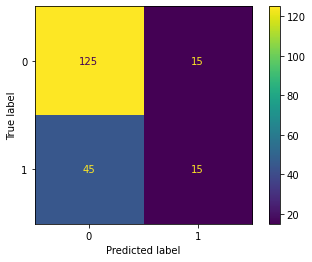

In [62]:
cm = confusion_matrix(y_test, y_predict)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [63]:
print(accuracy_score(y_test, y_predict))
print(precision_score(y_test, y_predict))
print(recall_score(y_test, y_predict))
print(f1_score(y_test, y_predict))

0.7
0.5
0.25
0.3333333333333333


#### Decision Tree

In [64]:
dtc = DecisionTreeClassifier(class_weight = {0:3,1:7})
dtc.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 3, 1: 7})

In [65]:
y_predict = dtc.predict(x_test)

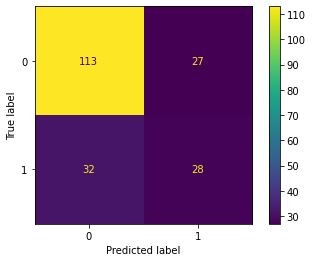

In [66]:
cm = confusion_matrix(y_test, y_predict)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [67]:
print(accuracy_score(y_test, y_predict))
print(precision_score(y_test, y_predict))
print(recall_score(y_test, y_predict))
print(f1_score(y_test, y_predict))

0.705
0.509090909090909
0.4666666666666667
0.4869565217391304


##### Hyperparameter Tuning

In [68]:
param_grid = [{
    "criterion":['gini', 'entropy', 'log_loss'],
    "max_depth":[2,3,4,5,6,7,8,None],    
}]

grid_search = GridSearchCV(dtc, param_grid, cv = 3, scoring = "accuracy", verbose = 10, refit = True)
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3; 1/24] START criterion=gini, max_depth=2................................
[CV 1/3; 1/24] END ..............criterion=gini, max_depth=2; total time=   0.0s
[CV 2/3; 1/24] START criterion=gini, max_depth=2................................
[CV 2/3; 1/24] END ..............criterion=gini, max_depth=2; total time=   0.0s
[CV 3/3; 1/24] START criterion=gini, max_depth=2................................
[CV 3/3; 1/24] END ..............criterion=gini, max_depth=2; total time=   0.0s
[CV 1/3; 2/24] START criterion=gini, max_depth=3................................
[CV 1/3; 2/24] END ..............criterion=gini, max_depth=3; total time=   0.0s
[CV 2/3; 2/24] START criterion=gini, max_depth=3................................
[CV 2/3; 2/24] END ..............criterion=gini, max_depth=3; total time=   0.0s
[CV 3/3; 2/24] START criterion=gini, max_depth=3................................
[CV 3/3; 2/24] END ..............criterion=gini,

[CV 1/3; 20/24] END .........criterion=log_loss, max_depth=5; total time=   0.0s
[CV 2/3; 20/24] START criterion=log_loss, max_depth=5...........................
[CV 2/3; 20/24] END .........criterion=log_loss, max_depth=5; total time=   0.0s
[CV 3/3; 20/24] START criterion=log_loss, max_depth=5...........................
[CV 3/3; 20/24] END .........criterion=log_loss, max_depth=5; total time=   0.0s
[CV 1/3; 21/24] START criterion=log_loss, max_depth=6...........................
[CV 1/3; 21/24] END .........criterion=log_loss, max_depth=6; total time=   0.0s
[CV 2/3; 21/24] START criterion=log_loss, max_depth=6...........................
[CV 2/3; 21/24] END .........criterion=log_loss, max_depth=6; total time=   0.0s
[CV 3/3; 21/24] START criterion=log_loss, max_depth=6...........................
[CV 3/3; 21/24] END .........criterion=log_loss, max_depth=6; total time=   0.0s
[CV 1/3; 22/24] START criterion=log_loss, max_depth=7...........................
[CV 1/3; 22/24] END ........

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(class_weight={0: 3, 1: 7}),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [2, 3, 4, 5, 6, 7, 8, None]}],
             scoring='accuracy', verbose=10)

In [69]:
final_dtc = grid_search.best_estimator_
final_dtc

DecisionTreeClassifier(class_weight={0: 3, 1: 7}, max_depth=7)

In [70]:
y_predict = final_dtc.predict(x_test)

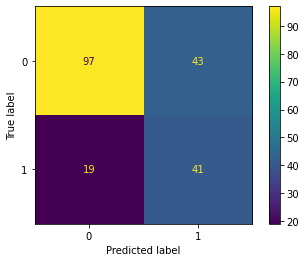

In [71]:
cm = confusion_matrix(y_test, y_predict)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [72]:
print(accuracy_score(y_test, y_predict))
print(precision_score(y_test, y_predict))
print(recall_score(y_test, y_predict))
print(f1_score(y_test, y_predict))

0.69
0.4880952380952381
0.6833333333333333
0.5694444444444444


### Cost Matrix = [0,1,5,0]

#### Logistic Regression

In [73]:
lr = LogisticRegression(class_weight = {0:1,1:5})
lr.fit(x_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 5})

In [74]:
y_predict = lr.predict(x_test)

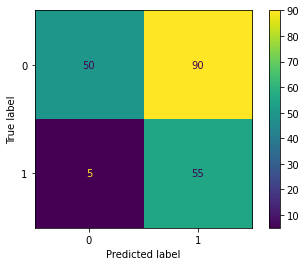

In [75]:
cm = confusion_matrix(y_test, y_predict)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [76]:
print(accuracy_score(y_test, y_predict))
print(precision_score(y_test, y_predict))
print(recall_score(y_test, y_predict))
print(f1_score(y_test, y_predict))

0.525
0.3793103448275862
0.9166666666666666
0.5365853658536586


##### Hyperparameter Tuning

In [77]:
param_grid = [{
    "penalty":["l1","l2","elasticnet"],
    "C":np.logspace(-5, 8, 15),
    'verbose':[0,1,2,3]
}]

grid_search = GridSearchCV(lr, param_grid, cv = 3, scoring = "accuracy", verbose = 10)
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits
[CV 1/3; 1/180] START C=1e-05, penalty=l1, verbose=0............................
[CV 1/3; 1/180] END ..........C=1e-05, penalty=l1, verbose=0; total time=   0.0s
[CV 2/3; 1/180] START C=1e-05, penalty=l1, verbose=0............................
[CV 2/3; 1/180] END ..........C=1e-05, penalty=l1, verbose=0; total time=   0.0s
[CV 3/3; 1/180] START C=1e-05, penalty=l1, verbose=0............................
[CV 3/3; 1/180] END ..........C=1e-05, penalty=l1, verbose=0; total time=   0.0s
[CV 1/3; 2/180] START C=1e-05, penalty=l1, verbose=1............................
[CV 1/3; 2/180] END ..........C=1e-05, penalty=l1, verbose=1; total time=   0.0s
[CV 2/3; 2/180] START C=1e-05, penalty=l1, verbose=1............................
[CV 2/3; 2/180] END ..........C=1e-05, penalty=l1, verbose=1; total time=   0.0s
[CV 3/3; 2/180] START C=1e-05, penalty=l1, verbose=1............................
[CV 3/3; 2/180] END ..........C=1e-05, penalty

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_valida

[CV 3/3; 7/180] END ..........C=1e-05, penalty=l2, verbose=2; total time=   0.0s
[CV 1/3; 8/180] START C=1e-05, penalty=l2, verbose=3............................
[CV 1/3; 8/180] END ..........C=1e-05, penalty=l2, verbose=3; total time=   0.0s
[CV 2/3; 8/180] START C=1e-05, penalty=l2, verbose=3............................
[CV 2/3; 8/180] END ..........C=1e-05, penalty=l2, verbose=3; total time=   0.0s
[CV 3/3; 8/180] START C=1e-05, penalty=l2, verbose=3............................
[CV 3/3; 8/180] END ..........C=1e-05, penalty=l2, verbose=3; total time=   0.0s
[CV 1/3; 9/180] START C=1e-05, penalty=elasticnet, verbose=0....................
[CV 1/3; 9/180] END ..C=1e-05, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 2/3; 9/180] START C=1e-05, penalty=elasticnet, verbose=0....................
[CV 2/3; 9/180] END ..C=1e-05, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 3/3; 9/180] START C=1e-05, penalty=elasticnet, verbose=0....................
[CV 3/3; 9/180] END ..C=1e-0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklear

[CV 2/3; 18/180] END C=8.483428982440725e-05, penalty=l2, verbose=1; total time=   0.0s
[CV 3/3; 18/180] START C=8.483428982440725e-05, penalty=l2, verbose=1...........
[CV 3/3; 18/180] END C=8.483428982440725e-05, penalty=l2, verbose=1; total time=   0.0s
[CV 1/3; 19/180] START C=8.483428982440725e-05, penalty=l2, verbose=2...........
[CV 1/3; 19/180] END C=8.483428982440725e-05, penalty=l2, verbose=2; total time=   0.0s
[CV 2/3; 19/180] START C=8.483428982440725e-05, penalty=l2, verbose=2...........
[CV 2/3; 19/180] END C=8.483428982440725e-05, penalty=l2, verbose=2; total time=   0.0s
[CV 3/3; 19/180] START C=8.483428982440725e-05, penalty=l2, verbose=2...........
[CV 3/3; 19/180] END C=8.483428982440725e-05, penalty=l2, verbose=2; total time=   0.0s
[CV 1/3; 20/180] START C=8.483428982440725e-05, penalty=l2, verbose=3...........
[CV 1/3; 20/180] END C=8.483428982440725e-05, penalty=l2, verbose=3; total time=   0.0s
[CV 2/3; 20/180] START C=8.483428982440725e-05, penalty=l2, verbose

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    


[CV 2/3; 25/180] END C=0.0007196856730011522, penalty=l1, verbose=0; total time=   0.0s
[CV 3/3; 25/180] START C=0.0007196856730011522, penalty=l1, verbose=0...........
[CV 3/3; 25/180] END C=0.0007196856730011522, penalty=l1, verbose=0; total time=   0.0s
[CV 1/3; 26/180] START C=0.0007196856730011522, penalty=l1, verbose=1...........
[CV 1/3; 26/180] END C=0.0007196856730011522, penalty=l1, verbose=1; total time=   0.0s
[CV 2/3; 26/180] START C=0.0007196856730011522, penalty=l1, verbose=1...........
[CV 2/3; 26/180] END C=0.0007196856730011522, penalty=l1, verbose=1; total time=   0.0s
[CV 3/3; 26/180] START C=0.0007196856730011522, penalty=l1, verbose=1...........
[CV 3/3; 26/180] END C=0.0007196856730011522, penalty=l1, verbose=1; total time=   0.0s
[CV 1/3; 27/180] START C=0.0007196856730011522, penalty=l1, verbose=2...........
[CV 1/3; 27/180] END C=0.0007196856730011522, penalty=l1, verbose=2; total time=   0.0s
[CV 2/3; 27/180] START C=0.0007196856730011522, penalty=l1, verbos

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_valida

[CV 1/3; 32/180] END C=0.0007196856730011522, penalty=l2, verbose=3; total time=   0.0s
[CV 2/3; 32/180] START C=0.0007196856730011522, penalty=l2, verbose=3...........
[CV 2/3; 32/180] END C=0.0007196856730011522, penalty=l2, verbose=3; total time=   0.0s
[CV 3/3; 32/180] START C=0.0007196856730011522, penalty=l2, verbose=3...........
[CV 3/3; 32/180] END C=0.0007196856730011522, penalty=l2, verbose=3; total time=   0.0s
[CV 1/3; 33/180] START C=0.0007196856730011522, penalty=elasticnet, verbose=0...
[CV 1/3; 33/180] END C=0.0007196856730011522, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 2/3; 33/180] START C=0.0007196856730011522, penalty=elasticnet, verbose=0...
[CV 2/3; 33/180] END C=0.0007196856730011522, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 3/3; 33/180] START C=0.0007196856730011522, penalty=elasticnet, verbose=0...
[CV 3/3; 33/180] END C=0.0007196856730011522, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 1/3; 34/180] START C=0.0007196856730011

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _

[CV 2/3; 43/180] END C=0.006105402296585327, penalty=l2, verbose=2; total time=   0.0s
[CV 3/3; 43/180] START C=0.006105402296585327, penalty=l2, verbose=2............
[CV 3/3; 43/180] END C=0.006105402296585327, penalty=l2, verbose=2; total time=   0.0s
[CV 1/3; 44/180] START C=0.006105402296585327, penalty=l2, verbose=3............
[CV 1/3; 44/180] END C=0.006105402296585327, penalty=l2, verbose=3; total time=   0.0s
[CV 2/3; 44/180] START C=0.006105402296585327, penalty=l2, verbose=3............
[CV 2/3; 44/180] END C=0.006105402296585327, penalty=l2, verbose=3; total time=   0.0s
[CV 3/3; 44/180] START C=0.006105402296585327, penalty=l2, verbose=3............
[CV 3/3; 44/180] END C=0.006105402296585327, penalty=l2, verbose=3; total time=   0.0s
[CV 1/3; 45/180] START C=0.006105402296585327, penalty=elasticnet, verbose=0....
[CV 1/3; 45/180] END C=0.006105402296585327, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 2/3; 45/180] START C=0.006105402296585327, penalty=elasticnet

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validatio

[CV 3/3; 54/180] END C=0.05179474679231213, penalty=l2, verbose=1; total time=   0.0s
[CV 1/3; 55/180] START C=0.05179474679231213, penalty=l2, verbose=2.............
[CV 1/3; 55/180] END C=0.05179474679231213, penalty=l2, verbose=2; total time=   0.0s
[CV 2/3; 55/180] START C=0.05179474679231213, penalty=l2, verbose=2.............
[CV 2/3; 55/180] END C=0.05179474679231213, penalty=l2, verbose=2; total time=   0.0s
[CV 3/3; 55/180] START C=0.05179474679231213, penalty=l2, verbose=2.............
[CV 3/3; 55/180] END C=0.05179474679231213, penalty=l2, verbose=2; total time=   0.0s
[CV 1/3; 56/180] START C=0.05179474679231213, penalty=l2, verbose=3.............
[CV 1/3; 56/180] END C=0.05179474679231213, penalty=l2, verbose=3; total time=   0.0s
[CV 2/3; 56/180] START C=0.05179474679231213, penalty=l2, verbose=3.............
[CV 2/3; 56/180] END C=0.05179474679231213, penalty=l2, verbose=3; total time=   0.0s
[CV 3/3; 56/180] START C=0.05179474679231213, penalty=l2, verbose=3............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work


[CV 1/3; 57/180] END C=0.05179474679231213, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 2/3; 57/180] START C=0.05179474679231213, penalty=elasticnet, verbose=0.....
[CV 2/3; 57/180] END C=0.05179474679231213, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 3/3; 57/180] START C=0.05179474679231213, penalty=elasticnet, verbose=0.....
[CV 3/3; 57/180] END C=0.05179474679231213, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 1/3; 58/180] START C=0.05179474679231213, penalty=elasticnet, verbose=1.....
[CV 1/3; 58/180] END C=0.05179474679231213, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 2/3; 58/180] START C=0.05179474679231213, penalty=elasticnet, verbose=1.....
[CV 2/3; 58/180] END C=0.05179474679231213, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 3/3; 58/180] START C=0.05179474679231213, penalty=elasticnet, verbose=1.....
[CV 3/3; 58/180] END C=0.05179474679231213, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 1/3; 59/180] START C=0.051

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection

[CV 2/3; 66/180] END C=0.4393970560760795, penalty=l2, verbose=1; total time=   0.0s
[CV 3/3; 66/180] START C=0.4393970560760795, penalty=l2, verbose=1..............
[CV 3/3; 66/180] END C=0.4393970560760795, penalty=l2, verbose=1; total time=   0.0s
[CV 1/3; 67/180] START C=0.4393970560760795, penalty=l2, verbose=2..............
[CV 1/3; 67/180] END C=0.4393970560760795, penalty=l2, verbose=2; total time=   0.0s
[CV 2/3; 67/180] START C=0.4393970560760795, penalty=l2, verbose=2..............
[CV 2/3; 67/180] END C=0.4393970560760795, penalty=l2, verbose=2; total time=   0.0s
[CV 3/3; 67/180] START C=0.4393970560760795, penalty=l2, verbose=2..............
[CV 3/3; 67/180] END C=0.4393970560760795, penalty=l2, verbose=2; total time=   0.0s
[CV 1/3; 68/180] START C=0.4393970560760795, penalty=l2, verbose=3..............
[CV 1/3; 68/180] END C=0.4393970560760795, penalty=l2, verbose=3; total time=   0.0s
[CV 2/3; 68/180] START C=0.4393970560760795, penalty=l2, verbose=3..............
[CV 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    

[CV 1/3; 69/180] START C=0.4393970560760795, penalty=elasticnet, verbose=0......
[CV 1/3; 69/180] END C=0.4393970560760795, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 2/3; 69/180] START C=0.4393970560760795, penalty=elasticnet, verbose=0......
[CV 2/3; 69/180] END C=0.4393970560760795, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 3/3; 69/180] START C=0.4393970560760795, penalty=elasticnet, verbose=0......
[CV 3/3; 69/180] END C=0.4393970560760795, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 1/3; 70/180] START C=0.4393970560760795, penalty=elasticnet, verbose=1......
[CV 1/3; 70/180] END C=0.4393970560760795, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 2/3; 70/180] START C=0.4393970560760795, penalty=elasticnet, verbose=1......
[CV 2/3; 70/180] END C=0.4393970560760795, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 3/3; 70/180] START C=0.4393970560760795, penalty=elasticnet, verbose=1......
[CV 3/3; 70/180] END C=0.4393970560760795, penalt

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection

[CV 2/3; 78/180] END C=3.727593720314938, penalty=l2, verbose=1; total time=   0.0s
[CV 3/3; 78/180] START C=3.727593720314938, penalty=l2, verbose=1...............
[CV 3/3; 78/180] END C=3.727593720314938, penalty=l2, verbose=1; total time=   0.0s
[CV 1/3; 79/180] START C=3.727593720314938, penalty=l2, verbose=2...............
[CV 1/3; 79/180] END C=3.727593720314938, penalty=l2, verbose=2; total time=   0.0s
[CV 2/3; 79/180] START C=3.727593720314938, penalty=l2, verbose=2...............
[CV 2/3; 79/180] END C=3.727593720314938, penalty=l2, verbose=2; total time=   0.0s
[CV 3/3; 79/180] START C=3.727593720314938, penalty=l2, verbose=2...............
[CV 3/3; 79/180] END C=3.727593720314938, penalty=l2, verbose=2; total time=   0.0s
[CV 1/3; 80/180] START C=3.727593720314938, penalty=l2, verbose=3...............
[CV 1/3; 80/180] END C=3.727593720314938, penalty=l2, verbose=3; total time=   0.0s
[CV 2/3; 80/180] START C=3.727593720314938, penalty=l2, verbose=3...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    

[CV 2/3; 80/180] END C=3.727593720314938, penalty=l2, verbose=3; total time=   0.0s
[CV 3/3; 80/180] START C=3.727593720314938, penalty=l2, verbose=3...............
[CV 3/3; 80/180] END C=3.727593720314938, penalty=l2, verbose=3; total time=   0.0s
[CV 1/3; 81/180] START C=3.727593720314938, penalty=elasticnet, verbose=0.......
[CV 1/3; 81/180] END C=3.727593720314938, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 2/3; 81/180] START C=3.727593720314938, penalty=elasticnet, verbose=0.......
[CV 2/3; 81/180] END C=3.727593720314938, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 3/3; 81/180] START C=3.727593720314938, penalty=elasticnet, verbose=0.......
[CV 3/3; 81/180] END C=3.727593720314938, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 1/3; 82/180] START C=3.727593720314938, penalty=elasticnet, verbose=1.......
[CV 1/3; 82/180] END C=3.727593720314938, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 2/3; 82/180] START C=3.727593720314938, penalty=elastic

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    

[CV 1/3; 92/180] END C=31.622776601683793, penalty=l2, verbose=3; total time=   0.0s
[CV 2/3; 92/180] START C=31.622776601683793, penalty=l2, verbose=3..............
[CV 2/3; 92/180] END C=31.622776601683793, penalty=l2, verbose=3; total time=   0.0s
[CV 3/3; 92/180] START C=31.622776601683793, penalty=l2, verbose=3..............
[CV 3/3; 92/180] END C=31.622776601683793, penalty=l2, verbose=3; total time=   0.0s
[CV 1/3; 93/180] START C=31.622776601683793, penalty=elasticnet, verbose=0......
[CV 1/3; 93/180] END C=31.622776601683793, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 2/3; 93/180] START C=31.622776601683793, penalty=elasticnet, verbose=0......
[CV 2/3; 93/180] END C=31.622776601683793, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 3/3; 93/180] START C=31.622776601683793, penalty=elasticnet, verbose=0......
[CV 3/3; 93/180] END C=31.622776601683793, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 1/3; 94/180] START C=31.622776601683793, penalty=elasticn

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda

[CV 2/3; 101/180] END C=268.2695795279727, penalty=l2, verbose=0; total time=   0.0s
[CV 3/3; 101/180] START C=268.2695795279727, penalty=l2, verbose=0..............
[CV 3/3; 101/180] END C=268.2695795279727, penalty=l2, verbose=0; total time=   0.0s
[CV 1/3; 102/180] START C=268.2695795279727, penalty=l2, verbose=1..............
[CV 1/3; 102/180] END C=268.2695795279727, penalty=l2, verbose=1; total time=   0.0s
[CV 2/3; 102/180] START C=268.2695795279727, penalty=l2, verbose=1..............
[CV 2/3; 102/180] END C=268.2695795279727, penalty=l2, verbose=1; total time=   0.0s
[CV 3/3; 102/180] START C=268.2695795279727, penalty=l2, verbose=1..............
[CV 3/3; 102/180] END C=268.2695795279727, penalty=l2, verbose=1; total time=   0.0s
[CV 1/3; 103/180] START C=268.2695795279727, penalty=l2, verbose=2..............
[CV 1/3; 103/180] END C=268.2695795279727, penalty=l2, verbose=2; total time=   0.0s
[CV 2/3; 103/180] START C=268.2695795279727, penalty=l2, verbose=2..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Par

[CV 2/3; 103/180] END C=268.2695795279727, penalty=l2, verbose=2; total time=   0.0s
[CV 3/3; 103/180] START C=268.2695795279727, penalty=l2, verbose=2..............
[CV 3/3; 103/180] END C=268.2695795279727, penalty=l2, verbose=2; total time=   0.0s
[CV 1/3; 104/180] START C=268.2695795279727, penalty=l2, verbose=3..............
[CV 1/3; 104/180] END C=268.2695795279727, penalty=l2, verbose=3; total time=   0.0s
[CV 2/3; 104/180] START C=268.2695795279727, penalty=l2, verbose=3..............
[CV 2/3; 104/180] END C=268.2695795279727, penalty=l2, verbose=3; total time=   0.0s
[CV 3/3; 104/180] START C=268.2695795279727, penalty=l2, verbose=3..............
[CV 3/3; 104/180] END C=268.2695795279727, penalty=l2, verbose=3; total time=   0.0s
[CV 1/3; 105/180] START C=268.2695795279727, penalty=elasticnet, verbose=0......
[CV 1/3; 105/180] END C=268.2695795279727, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 2/3; 105/180] START C=268.2695795279727, penalty=elasticnet, verbose=0...

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklear

[CV 3/3; 105/180] END C=268.2695795279727, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 1/3; 106/180] START C=268.2695795279727, penalty=elasticnet, verbose=1......
[CV 1/3; 106/180] END C=268.2695795279727, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 2/3; 106/180] START C=268.2695795279727, penalty=elasticnet, verbose=1......
[CV 2/3; 106/180] END C=268.2695795279727, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 3/3; 106/180] START C=268.2695795279727, penalty=elasticnet, verbose=1......
[CV 3/3; 106/180] END C=268.2695795279727, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 1/3; 107/180] START C=268.2695795279727, penalty=elasticnet, verbose=2......
[CV 1/3; 107/180] END C=268.2695795279727, penalty=elasticnet, verbose=2; total time=   0.0s
[CV 2/3; 107/180] START C=268.2695795279727, penalty=elasticnet, verbose=2......
[CV 2/3; 107/180] END C=268.2695795279727, penalty=elasticnet, verbose=2; total time=   0.0s
[CV 3/3; 107/180] START C=268.2695795

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_valida

[CV 3/3; 114/180] END C=2275.845926074791, penalty=l2, verbose=1; total time=   0.0s
[CV 1/3; 115/180] START C=2275.845926074791, penalty=l2, verbose=2..............
[CV 1/3; 115/180] END C=2275.845926074791, penalty=l2, verbose=2; total time=   0.0s
[CV 2/3; 115/180] START C=2275.845926074791, penalty=l2, verbose=2..............
[CV 2/3; 115/180] END C=2275.845926074791, penalty=l2, verbose=2; total time=   0.0s
[CV 3/3; 115/180] START C=2275.845926074791, penalty=l2, verbose=2..............
[CV 3/3; 115/180] END C=2275.845926074791, penalty=l2, verbose=2; total time=   0.0s
[CV 1/3; 116/180] START C=2275.845926074791, penalty=l2, verbose=3..............
[CV 1/3; 116/180] END C=2275.845926074791, penalty=l2, verbose=3; total time=   0.0s
[CV 2/3; 116/180] START C=2275.845926074791, penalty=l2, verbose=3..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

[CV 2/3; 116/180] END C=2275.845926074791, penalty=l2, verbose=3; total time=   0.0s
[CV 3/3; 116/180] START C=2275.845926074791, penalty=l2, verbose=3..............
[CV 3/3; 116/180] END C=2275.845926074791, penalty=l2, verbose=3; total time=   0.0s
[CV 1/3; 117/180] START C=2275.845926074791, penalty=elasticnet, verbose=0......
[CV 1/3; 117/180] END C=2275.845926074791, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 2/3; 117/180] START C=2275.845926074791, penalty=elasticnet, verbose=0......
[CV 2/3; 117/180] END C=2275.845926074791, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 3/3; 117/180] START C=2275.845926074791, penalty=elasticnet, verbose=0......
[CV 3/3; 117/180] END C=2275.845926074791, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 1/3; 118/180] START C=2275.845926074791, penalty=elasticnet, verbose=1......
[CV 1/3; 118/180] END C=2275.845926074791, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 2/3; 118/180] START C=2275.845926074791, penalty=

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elast

[CV 3/3; 125/180] END C=19306.977288832535, penalty=l2, verbose=0; total time=   0.0s
[CV 1/3; 126/180] START C=19306.977288832535, penalty=l2, verbose=1.............
[CV 1/3; 126/180] END C=19306.977288832535, penalty=l2, verbose=1; total time=   0.0s
[CV 2/3; 126/180] START C=19306.977288832535, penalty=l2, verbose=1.............
[CV 2/3; 126/180] END C=19306.977288832535, penalty=l2, verbose=1; total time=   0.0s
[CV 3/3; 126/180] START C=19306.977288832535, penalty=l2, verbose=1.............
[CV 3/3; 126/180] END C=19306.977288832535, penalty=l2, verbose=1; total time=   0.0s
[CV 1/3; 127/180] START C=19306.977288832535, penalty=l2, verbose=2.............
[CV 1/3; 127/180] END C=19306.977288832535, penalty=l2, verbose=2; total time=   0.0s
[CV 2/3; 127/180] START C=19306.977288832535, penalty=l2, verbose=2.............
[CV 2/3; 127/180] END C=19306.977288832535, penalty=l2, verbose=2; total time=   0.0s
[CV 3/3; 127/180] START C=19306.977288832535, penalty=l2, verbose=2............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    

[CV 1/3; 128/180] END C=19306.977288832535, penalty=l2, verbose=3; total time=   0.0s
[CV 2/3; 128/180] START C=19306.977288832535, penalty=l2, verbose=3.............
[CV 2/3; 128/180] END C=19306.977288832535, penalty=l2, verbose=3; total time=   0.0s
[CV 3/3; 128/180] START C=19306.977288832535, penalty=l2, verbose=3.............
[CV 3/3; 128/180] END C=19306.977288832535, penalty=l2, verbose=3; total time=   0.0s
[CV 1/3; 129/180] START C=19306.977288832535, penalty=elasticnet, verbose=0.....
[CV 1/3; 129/180] END C=19306.977288832535, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 2/3; 129/180] START C=19306.977288832535, penalty=elasticnet, verbose=0.....
[CV 2/3; 129/180] END C=19306.977288832535, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 3/3; 129/180] START C=19306.977288832535, penalty=elasticnet, verbose=0.....
[CV 3/3; 129/180] END C=19306.977288832535, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 1/3; 130/180] START C=19306.977288832535, penalty=e

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _

[CV 3/3; 137/180] END C=163789.3706954068, penalty=l2, verbose=0; total time=   0.0s
[CV 1/3; 138/180] START C=163789.3706954068, penalty=l2, verbose=1..............
[CV 1/3; 138/180] END C=163789.3706954068, penalty=l2, verbose=1; total time=   0.0s
[CV 2/3; 138/180] START C=163789.3706954068, penalty=l2, verbose=1..............
[CV 2/3; 138/180] END C=163789.3706954068, penalty=l2, verbose=1; total time=   0.0s
[CV 3/3; 138/180] START C=163789.3706954068, penalty=l2, verbose=1..............
[CV 3/3; 138/180] END C=163789.3706954068, penalty=l2, verbose=1; total time=   0.0s
[CV 1/3; 139/180] START C=163789.3706954068, penalty=l2, verbose=2..............
[CV 1/3; 139/180] END C=163789.3706954068, penalty=l2, verbose=2; total time=   0.0s
[CV 2/3; 139/180] START C=163789.3706954068, penalty=l2, verbose=2..............
[CV 2/3; 139/180] END C=163789.3706954068, penalty=l2, verbose=2; total time=   0.0s
[CV 3/3; 139/180] START C=163789.3706954068, penalty=l2, verbose=2..............
[CV 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Par

[CV 2/3; 140/180] END C=163789.3706954068, penalty=l2, verbose=3; total time=   0.0s
[CV 3/3; 140/180] START C=163789.3706954068, penalty=l2, verbose=3..............
[CV 3/3; 140/180] END C=163789.3706954068, penalty=l2, verbose=3; total time=   0.0s
[CV 1/3; 141/180] START C=163789.3706954068, penalty=elasticnet, verbose=0......
[CV 1/3; 141/180] END C=163789.3706954068, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 2/3; 141/180] START C=163789.3706954068, penalty=elasticnet, verbose=0......
[CV 2/3; 141/180] END C=163789.3706954068, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 3/3; 141/180] START C=163789.3706954068, penalty=elasticnet, verbose=0......
[CV 3/3; 141/180] END C=163789.3706954068, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 1/3; 142/180] START C=163789.3706954068, penalty=elasticnet, verbose=1......
[CV 1/3; 142/180] END C=163789.3706954068, penalty=elasticnet, verbose=1; total time=   0.0s
[CV 2/3; 142/180] START C=163789.3706954068, penalty=

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Para

[CV 1/3; 150/180] END C=1389495.494373136, penalty=l2, verbose=1; total time=   0.0s
[CV 2/3; 150/180] START C=1389495.494373136, penalty=l2, verbose=1..............
[CV 2/3; 150/180] END C=1389495.494373136, penalty=l2, verbose=1; total time=   0.0s
[CV 3/3; 150/180] START C=1389495.494373136, penalty=l2, verbose=1..............
[CV 3/3; 150/180] END C=1389495.494373136, penalty=l2, verbose=1; total time=   0.0s
[CV 1/3; 151/180] START C=1389495.494373136, penalty=l2, verbose=2..............
[CV 1/3; 151/180] END C=1389495.494373136, penalty=l2, verbose=2; total time=   0.0s
[CV 2/3; 151/180] START C=1389495.494373136, penalty=l2, verbose=2..............
[CV 2/3; 151/180] END C=1389495.494373136, penalty=l2, verbose=2; total time=   0.0s
[CV 3/3; 151/180] START C=1389495.494373136, penalty=l2, verbose=2..............
[CV 3/3; 151/180] END C=1389495.494373136, penalty=l2, verbose=2; total time=   0.0s
[CV 1/3; 152/180] START C=1389495.494373136, penalty=l2, verbose=3..............
[CV 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _

[CV 1/3; 159/180] END C=11787686.347935867, penalty=l1, verbose=2; total time=   0.0s
[CV 2/3; 159/180] START C=11787686.347935867, penalty=l1, verbose=2.............
[CV 2/3; 159/180] END C=11787686.347935867, penalty=l1, verbose=2; total time=   0.0s
[CV 3/3; 159/180] START C=11787686.347935867, penalty=l1, verbose=2.............
[CV 3/3; 159/180] END C=11787686.347935867, penalty=l1, verbose=2; total time=   0.0s
[CV 1/3; 160/180] START C=11787686.347935867, penalty=l1, verbose=3.............
[CV 1/3; 160/180] END C=11787686.347935867, penalty=l1, verbose=3; total time=   0.0s
[CV 2/3; 160/180] START C=11787686.347935867, penalty=l1, verbose=3.............
[CV 2/3; 160/180] END C=11787686.347935867, penalty=l1, verbose=3; total time=   0.0s
[CV 3/3; 160/180] START C=11787686.347935867, penalty=l1, verbose=3.............
[CV 3/3; 160/180] END C=11787686.347935867, penalty=l1, verbose=3; total time=   0.0s
[CV 1/3; 161/180] START C=11787686.347935867, penalty=l2, verbose=0............

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_valida

[CV 2/3; 163/180] END C=11787686.347935867, penalty=l2, verbose=2; total time=   0.0s
[CV 3/3; 163/180] START C=11787686.347935867, penalty=l2, verbose=2.............
[CV 3/3; 163/180] END C=11787686.347935867, penalty=l2, verbose=2; total time=   0.0s
[CV 1/3; 164/180] START C=11787686.347935867, penalty=l2, verbose=3.............
[CV 1/3; 164/180] END C=11787686.347935867, penalty=l2, verbose=3; total time=   0.0s
[CV 2/3; 164/180] START C=11787686.347935867, penalty=l2, verbose=3.............
[CV 2/3; 164/180] END C=11787686.347935867, penalty=l2, verbose=3; total time=   0.0s
[CV 3/3; 164/180] START C=11787686.347935867, penalty=l2, verbose=3.............
[CV 3/3; 164/180] END C=11787686.347935867, penalty=l2, verbose=3; total time=   0.0s
[CV 1/3; 165/180] START C=11787686.347935867, penalty=elasticnet, verbose=0.....
[CV 1/3; 165/180] END C=11787686.347935867, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 2/3; 165/180] START C=11787686.347935867, penalty=elasticnet, verbo

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection

[CV 2/3; 174/180] END ..C=100000000.0, penalty=l2, verbose=1; total time=   0.0s
[CV 3/3; 174/180] START C=100000000.0, penalty=l2, verbose=1....................
[CV 3/3; 174/180] END ..C=100000000.0, penalty=l2, verbose=1; total time=   0.0s
[CV 1/3; 175/180] START C=100000000.0, penalty=l2, verbose=2....................
[CV 1/3; 175/180] END ..C=100000000.0, penalty=l2, verbose=2; total time=   0.0s
[CV 2/3; 175/180] START C=100000000.0, penalty=l2, verbose=2....................
[CV 2/3; 175/180] END ..C=100000000.0, penalty=l2, verbose=2; total time=   0.0s
[CV 3/3; 175/180] START C=100000000.0, penalty=l2, verbose=2....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


[CV 3/3; 175/180] END ..C=100000000.0, penalty=l2, verbose=2; total time=   0.0s
[CV 1/3; 176/180] START C=100000000.0, penalty=l2, verbose=3....................
[CV 1/3; 176/180] END ..C=100000000.0, penalty=l2, verbose=3; total time=   0.0s
[CV 2/3; 176/180] START C=100000000.0, penalty=l2, verbose=3....................
[CV 2/3; 176/180] END ..C=100000000.0, penalty=l2, verbose=3; total time=   0.0s
[CV 3/3; 176/180] START C=100000000.0, penalty=l2, verbose=3....................
[CV 3/3; 176/180] END ..C=100000000.0, penalty=l2, verbose=3; total time=   0.0s
[CV 1/3; 177/180] START C=100000000.0, penalty=elasticnet, verbose=0............
[CV 1/3; 177/180] END C=100000000.0, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 2/3; 177/180] START C=100000000.0, penalty=elasticnet, verbose=0............
[CV 2/3; 177/180] END C=100000000.0, penalty=elasticnet, verbose=0; total time=   0.0s
[CV 3/3; 177/180] START C=100000000.0, penalty=elasticnet, verbose=0............
[CV 3/3; 177/180

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklear

GridSearchCV(cv=3, estimator=LogisticRegression(class_weight={0: 1, 1: 5}),
             param_grid=[{'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                          'penalty': ['l1', 'l2', 'elasticnet'],
                          'verbose': [0, 1, 2, 3]}],
             scoring='accuracy', verbose=10)

In [78]:
final_lr = grid_search.best_estimator_
final_lr

LogisticRegression(C=31.622776601683793, class_weight={0: 1, 1: 5})

In [79]:
y_predict = final_lr.predict(x_test)

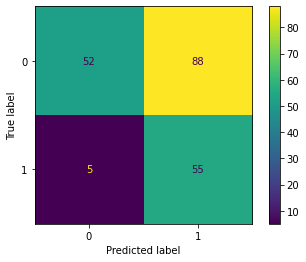

In [80]:
cm = confusion_matrix(y_test, y_predict)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [81]:
print(accuracy_score(y_test, y_predict))
print(precision_score(y_test, y_predict))
print(recall_score(y_test, y_predict))
print(f1_score(y_test, y_predict))

0.535
0.38461538461538464
0.9166666666666666
0.541871921182266


#### SVM

In [82]:
svc = SVC(class_weight = {0:1,1:5})
svc.fit(x_train, y_train)

SVC(class_weight={0: 1, 1: 5})

In [83]:
y_predict = svc.predict(x_test)

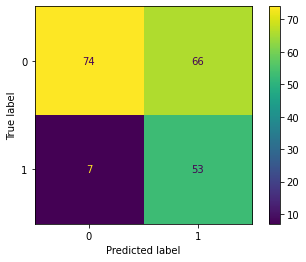

In [84]:
cm = confusion_matrix(y_test, y_predict)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [85]:
print(accuracy_score(y_test, y_predict))
print(precision_score(y_test, y_predict))
print(recall_score(y_test, y_predict))
print(f1_score(y_test, y_predict))

0.635
0.44537815126050423
0.8833333333333333
0.5921787709497207


##### Hyperparameter Tuning

In [86]:
param_grid = [{
    "C":np.logspace(-5, 8, 15),
    "kernel":['poly', 'rbf', 'sigmoid'],
    'degree':[3,4,5,6,7]
}]

grid_search = GridSearchCV(svc, param_grid, cv = 3, scoring = "accuracy", verbose = 10, refit = True)
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 225 candidates, totalling 675 fits
[CV 1/3; 1/225] START C=1e-05, degree=3, kernel=poly............................
[CV 1/3; 1/225] END ..........C=1e-05, degree=3, kernel=poly; total time=   0.0s
[CV 2/3; 1/225] START C=1e-05, degree=3, kernel=poly............................
[CV 2/3; 1/225] END ..........C=1e-05, degree=3, kernel=poly; total time=   0.0s
[CV 3/3; 1/225] START C=1e-05, degree=3, kernel=poly............................
[CV 3/3; 1/225] END ..........C=1e-05, degree=3, kernel=poly; total time=   0.0s
[CV 1/3; 2/225] START C=1e-05, degree=3, kernel=rbf.............................
[CV 1/3; 2/225] END ...........C=1e-05, degree=3, kernel=rbf; total time=   0.0s
[CV 2/3; 2/225] START C=1e-05, degree=3, kernel=rbf.............................
[CV 2/3; 2/225] END ...........C=1e-05, degree=3, kernel=rbf; total time=   0.0s
[CV 3/3; 2/225] START C=1e-05, degree=3, kernel=rbf.............................
[CV 3/3; 2/225] END ...........C=1e-05, degree

[CV 1/3; 18/225] END C=8.483428982440725e-05, degree=3, kernel=sigmoid; total time=   0.0s
[CV 2/3; 18/225] START C=8.483428982440725e-05, degree=3, kernel=sigmoid........
[CV 2/3; 18/225] END C=8.483428982440725e-05, degree=3, kernel=sigmoid; total time=   0.0s
[CV 3/3; 18/225] START C=8.483428982440725e-05, degree=3, kernel=sigmoid........
[CV 3/3; 18/225] END C=8.483428982440725e-05, degree=3, kernel=sigmoid; total time=   0.0s
[CV 1/3; 19/225] START C=8.483428982440725e-05, degree=4, kernel=poly...........
[CV 1/3; 19/225] END C=8.483428982440725e-05, degree=4, kernel=poly; total time=   0.0s
[CV 2/3; 19/225] START C=8.483428982440725e-05, degree=4, kernel=poly...........
[CV 2/3; 19/225] END C=8.483428982440725e-05, degree=4, kernel=poly; total time=   0.0s
[CV 3/3; 19/225] START C=8.483428982440725e-05, degree=4, kernel=poly...........
[CV 3/3; 19/225] END C=8.483428982440725e-05, degree=4, kernel=poly; total time=   0.0s
[CV 1/3; 20/225] START C=8.483428982440725e-05, degree=4, 

[CV 3/3; 34/225] END C=0.0007196856730011522, degree=4, kernel=poly; total time=   0.0s
[CV 1/3; 35/225] START C=0.0007196856730011522, degree=4, kernel=rbf............
[CV 1/3; 35/225] END C=0.0007196856730011522, degree=4, kernel=rbf; total time=   0.0s
[CV 2/3; 35/225] START C=0.0007196856730011522, degree=4, kernel=rbf............
[CV 2/3; 35/225] END C=0.0007196856730011522, degree=4, kernel=rbf; total time=   0.0s
[CV 3/3; 35/225] START C=0.0007196856730011522, degree=4, kernel=rbf............
[CV 3/3; 35/225] END C=0.0007196856730011522, degree=4, kernel=rbf; total time=   0.0s
[CV 1/3; 36/225] START C=0.0007196856730011522, degree=4, kernel=sigmoid........
[CV 1/3; 36/225] END C=0.0007196856730011522, degree=4, kernel=sigmoid; total time=   0.0s
[CV 2/3; 36/225] START C=0.0007196856730011522, degree=4, kernel=sigmoid........
[CV 2/3; 36/225] END C=0.0007196856730011522, degree=4, kernel=sigmoid; total time=   0.0s
[CV 3/3; 36/225] START C=0.0007196856730011522, degree=4, kernel

[CV 2/3; 52/225] END C=0.006105402296585327, degree=5, kernel=poly; total time=   0.0s
[CV 3/3; 52/225] START C=0.006105402296585327, degree=5, kernel=poly............
[CV 3/3; 52/225] END C=0.006105402296585327, degree=5, kernel=poly; total time=   0.0s
[CV 1/3; 53/225] START C=0.006105402296585327, degree=5, kernel=rbf.............
[CV 1/3; 53/225] END C=0.006105402296585327, degree=5, kernel=rbf; total time=   0.0s
[CV 2/3; 53/225] START C=0.006105402296585327, degree=5, kernel=rbf.............
[CV 2/3; 53/225] END C=0.006105402296585327, degree=5, kernel=rbf; total time=   0.0s
[CV 3/3; 53/225] START C=0.006105402296585327, degree=5, kernel=rbf.............
[CV 3/3; 53/225] END C=0.006105402296585327, degree=5, kernel=rbf; total time=   0.0s
[CV 1/3; 54/225] START C=0.006105402296585327, degree=5, kernel=sigmoid.........
[CV 1/3; 54/225] END C=0.006105402296585327, degree=5, kernel=sigmoid; total time=   0.0s
[CV 2/3; 54/225] START C=0.006105402296585327, degree=5, kernel=sigmoid..

[CV 3/3; 68/225] END C=0.05179474679231213, degree=5, kernel=rbf; total time=   0.0s
[CV 1/3; 69/225] START C=0.05179474679231213, degree=5, kernel=sigmoid..........
[CV 1/3; 69/225] END C=0.05179474679231213, degree=5, kernel=sigmoid; total time=   0.0s
[CV 2/3; 69/225] START C=0.05179474679231213, degree=5, kernel=sigmoid..........
[CV 2/3; 69/225] END C=0.05179474679231213, degree=5, kernel=sigmoid; total time=   0.0s
[CV 3/3; 69/225] START C=0.05179474679231213, degree=5, kernel=sigmoid..........
[CV 3/3; 69/225] END C=0.05179474679231213, degree=5, kernel=sigmoid; total time=   0.0s
[CV 1/3; 70/225] START C=0.05179474679231213, degree=6, kernel=poly.............
[CV 1/3; 70/225] END C=0.05179474679231213, degree=6, kernel=poly; total time=   0.0s
[CV 2/3; 70/225] START C=0.05179474679231213, degree=6, kernel=poly.............
[CV 2/3; 70/225] END C=0.05179474679231213, degree=6, kernel=poly; total time=   0.0s
[CV 3/3; 70/225] START C=0.05179474679231213, degree=6, kernel=poly....

[CV 3/3; 85/225] END C=0.4393970560760795, degree=6, kernel=poly; total time=   0.0s
[CV 1/3; 86/225] START C=0.4393970560760795, degree=6, kernel=rbf...............
[CV 1/3; 86/225] END C=0.4393970560760795, degree=6, kernel=rbf; total time=   0.0s
[CV 2/3; 86/225] START C=0.4393970560760795, degree=6, kernel=rbf...............
[CV 2/3; 86/225] END C=0.4393970560760795, degree=6, kernel=rbf; total time=   0.0s
[CV 3/3; 86/225] START C=0.4393970560760795, degree=6, kernel=rbf...............
[CV 3/3; 86/225] END C=0.4393970560760795, degree=6, kernel=rbf; total time=   0.0s
[CV 1/3; 87/225] START C=0.4393970560760795, degree=6, kernel=sigmoid...........
[CV 1/3; 87/225] END C=0.4393970560760795, degree=6, kernel=sigmoid; total time=   0.0s
[CV 2/3; 87/225] START C=0.4393970560760795, degree=6, kernel=sigmoid...........
[CV 2/3; 87/225] END C=0.4393970560760795, degree=6, kernel=sigmoid; total time=   0.0s
[CV 3/3; 87/225] START C=0.4393970560760795, degree=6, kernel=sigmoid...........
[

[CV 1/3; 103/225] END C=3.727593720314938, degree=7, kernel=poly; total time=   0.0s
[CV 2/3; 103/225] START C=3.727593720314938, degree=7, kernel=poly..............
[CV 2/3; 103/225] END C=3.727593720314938, degree=7, kernel=poly; total time=   0.0s
[CV 3/3; 103/225] START C=3.727593720314938, degree=7, kernel=poly..............
[CV 3/3; 103/225] END C=3.727593720314938, degree=7, kernel=poly; total time=   0.0s
[CV 1/3; 104/225] START C=3.727593720314938, degree=7, kernel=rbf...............
[CV 1/3; 104/225] END C=3.727593720314938, degree=7, kernel=rbf; total time=   0.0s
[CV 2/3; 104/225] START C=3.727593720314938, degree=7, kernel=rbf...............
[CV 2/3; 104/225] END C=3.727593720314938, degree=7, kernel=rbf; total time=   0.0s
[CV 3/3; 104/225] START C=3.727593720314938, degree=7, kernel=rbf...............
[CV 3/3; 104/225] END C=3.727593720314938, degree=7, kernel=rbf; total time=   0.0s
[CV 1/3; 105/225] START C=3.727593720314938, degree=7, kernel=sigmoid...........
[CV 1/3

[CV 1/3; 120/225] END C=31.622776601683793, degree=7, kernel=sigmoid; total time=   0.0s
[CV 2/3; 120/225] START C=31.622776601683793, degree=7, kernel=sigmoid..........
[CV 2/3; 120/225] END C=31.622776601683793, degree=7, kernel=sigmoid; total time=   0.0s
[CV 3/3; 120/225] START C=31.622776601683793, degree=7, kernel=sigmoid..........
[CV 3/3; 120/225] END C=31.622776601683793, degree=7, kernel=sigmoid; total time=   0.0s
[CV 1/3; 121/225] START C=268.2695795279727, degree=3, kernel=poly..............
[CV 1/3; 121/225] END C=268.2695795279727, degree=3, kernel=poly; total time=   0.0s
[CV 2/3; 121/225] START C=268.2695795279727, degree=3, kernel=poly..............
[CV 2/3; 121/225] END C=268.2695795279727, degree=3, kernel=poly; total time=   0.1s
[CV 3/3; 121/225] START C=268.2695795279727, degree=3, kernel=poly..............
[CV 3/3; 121/225] END C=268.2695795279727, degree=3, kernel=poly; total time=   0.0s
[CV 1/3; 122/225] START C=268.2695795279727, degree=3, kernel=rbf........

[CV 1/3; 137/225] END C=2275.845926074791, degree=3, kernel=rbf; total time=   0.0s
[CV 2/3; 137/225] START C=2275.845926074791, degree=3, kernel=rbf...............
[CV 2/3; 137/225] END C=2275.845926074791, degree=3, kernel=rbf; total time=   0.0s
[CV 3/3; 137/225] START C=2275.845926074791, degree=3, kernel=rbf...............
[CV 3/3; 137/225] END C=2275.845926074791, degree=3, kernel=rbf; total time=   0.0s
[CV 1/3; 138/225] START C=2275.845926074791, degree=3, kernel=sigmoid...........
[CV 1/3; 138/225] END C=2275.845926074791, degree=3, kernel=sigmoid; total time=   0.0s
[CV 2/3; 138/225] START C=2275.845926074791, degree=3, kernel=sigmoid...........
[CV 2/3; 138/225] END C=2275.845926074791, degree=3, kernel=sigmoid; total time=   0.0s
[CV 3/3; 138/225] START C=2275.845926074791, degree=3, kernel=sigmoid...........
[CV 3/3; 138/225] END C=2275.845926074791, degree=3, kernel=sigmoid; total time=   0.0s
[CV 1/3; 139/225] START C=2275.845926074791, degree=4, kernel=poly.............

[CV 3/3; 153/225] END C=19306.977288832535, degree=3, kernel=sigmoid; total time=   0.0s
[CV 1/3; 154/225] START C=19306.977288832535, degree=4, kernel=poly.............
[CV 1/3; 154/225] END C=19306.977288832535, degree=4, kernel=poly; total time=   0.0s
[CV 2/3; 154/225] START C=19306.977288832535, degree=4, kernel=poly.............
[CV 2/3; 154/225] END C=19306.977288832535, degree=4, kernel=poly; total time=   0.0s
[CV 3/3; 154/225] START C=19306.977288832535, degree=4, kernel=poly.............
[CV 3/3; 154/225] END C=19306.977288832535, degree=4, kernel=poly; total time=   0.0s
[CV 1/3; 155/225] START C=19306.977288832535, degree=4, kernel=rbf..............
[CV 1/3; 155/225] END C=19306.977288832535, degree=4, kernel=rbf; total time=   0.0s
[CV 2/3; 155/225] START C=19306.977288832535, degree=4, kernel=rbf..............
[CV 2/3; 155/225] END C=19306.977288832535, degree=4, kernel=rbf; total time=   0.0s
[CV 3/3; 155/225] START C=19306.977288832535, degree=4, kernel=rbf............

[CV 2/3; 170/225] END C=163789.3706954068, degree=4, kernel=rbf; total time=   0.0s
[CV 3/3; 170/225] START C=163789.3706954068, degree=4, kernel=rbf...............
[CV 3/3; 170/225] END C=163789.3706954068, degree=4, kernel=rbf; total time=   0.0s
[CV 1/3; 171/225] START C=163789.3706954068, degree=4, kernel=sigmoid...........
[CV 1/3; 171/225] END C=163789.3706954068, degree=4, kernel=sigmoid; total time=   0.0s
[CV 2/3; 171/225] START C=163789.3706954068, degree=4, kernel=sigmoid...........
[CV 2/3; 171/225] END C=163789.3706954068, degree=4, kernel=sigmoid; total time=   0.0s
[CV 3/3; 171/225] START C=163789.3706954068, degree=4, kernel=sigmoid...........
[CV 3/3; 171/225] END C=163789.3706954068, degree=4, kernel=sigmoid; total time=   0.0s
[CV 1/3; 172/225] START C=163789.3706954068, degree=5, kernel=poly..............
[CV 1/3; 172/225] END C=163789.3706954068, degree=5, kernel=poly; total time=   0.0s
[CV 2/3; 172/225] START C=163789.3706954068, degree=5, kernel=poly............

[CV 3/3; 187/225] END C=1389495.494373136, degree=5, kernel=poly; total time=   0.0s
[CV 1/3; 188/225] START C=1389495.494373136, degree=5, kernel=rbf...............
[CV 1/3; 188/225] END C=1389495.494373136, degree=5, kernel=rbf; total time=   0.0s
[CV 2/3; 188/225] START C=1389495.494373136, degree=5, kernel=rbf...............
[CV 2/3; 188/225] END C=1389495.494373136, degree=5, kernel=rbf; total time=   0.0s
[CV 3/3; 188/225] START C=1389495.494373136, degree=5, kernel=rbf...............
[CV 3/3; 188/225] END C=1389495.494373136, degree=5, kernel=rbf; total time=   0.0s
[CV 1/3; 189/225] START C=1389495.494373136, degree=5, kernel=sigmoid...........
[CV 1/3; 189/225] END C=1389495.494373136, degree=5, kernel=sigmoid; total time=   0.0s
[CV 2/3; 189/225] START C=1389495.494373136, degree=5, kernel=sigmoid...........
[CV 2/3; 189/225] END C=1389495.494373136, degree=5, kernel=sigmoid; total time=   0.0s
[CV 3/3; 189/225] START C=1389495.494373136, degree=5, kernel=sigmoid...........
[

[CV 3/3; 204/225] END C=11787686.347935867, degree=5, kernel=sigmoid; total time=   0.0s
[CV 1/3; 205/225] START C=11787686.347935867, degree=6, kernel=poly.............
[CV 1/3; 205/225] END C=11787686.347935867, degree=6, kernel=poly; total time=   0.0s
[CV 2/3; 205/225] START C=11787686.347935867, degree=6, kernel=poly.............
[CV 2/3; 205/225] END C=11787686.347935867, degree=6, kernel=poly; total time=   0.0s
[CV 3/3; 205/225] START C=11787686.347935867, degree=6, kernel=poly.............
[CV 3/3; 205/225] END C=11787686.347935867, degree=6, kernel=poly; total time=   0.0s
[CV 1/3; 206/225] START C=11787686.347935867, degree=6, kernel=rbf..............
[CV 1/3; 206/225] END C=11787686.347935867, degree=6, kernel=rbf; total time=   0.0s
[CV 2/3; 206/225] START C=11787686.347935867, degree=6, kernel=rbf..............
[CV 2/3; 206/225] END C=11787686.347935867, degree=6, kernel=rbf; total time=   0.0s
[CV 3/3; 206/225] START C=11787686.347935867, degree=6, kernel=rbf............

[CV 2/3; 222/225] END C=100000000.0, degree=6, kernel=sigmoid; total time=   0.0s
[CV 3/3; 222/225] START C=100000000.0, degree=6, kernel=sigmoid.................
[CV 3/3; 222/225] END C=100000000.0, degree=6, kernel=sigmoid; total time=   0.0s
[CV 1/3; 223/225] START C=100000000.0, degree=7, kernel=poly....................
[CV 1/3; 223/225] END ..C=100000000.0, degree=7, kernel=poly; total time=   0.0s
[CV 2/3; 223/225] START C=100000000.0, degree=7, kernel=poly....................
[CV 2/3; 223/225] END ..C=100000000.0, degree=7, kernel=poly; total time=   0.0s
[CV 3/3; 223/225] START C=100000000.0, degree=7, kernel=poly....................
[CV 3/3; 223/225] END ..C=100000000.0, degree=7, kernel=poly; total time=   0.0s
[CV 1/3; 224/225] START C=100000000.0, degree=7, kernel=rbf.....................
[CV 1/3; 224/225] END ...C=100000000.0, degree=7, kernel=rbf; total time=   0.0s
[CV 2/3; 224/225] START C=100000000.0, degree=7, kernel=rbf.....................
[CV 2/3; 224/225] END ...C

GridSearchCV(cv=3, estimator=SVC(class_weight={0: 1, 1: 5}),
             param_grid=[{'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                          'degree': [3, 4, 5, 6, 7],
                          'kernel': ['poly', 'rbf', 'sigmoid']}],
             scoring='accuracy', verbose=10)

In [87]:
final_svc = grid_search.best_estimator_
final_svc

SVC(C=31.622776601683793, class_weight={0: 1, 1: 5})

In [88]:
y_predict = final_svc.predict(x_test)

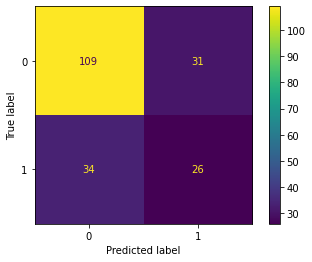

In [89]:
cm = confusion_matrix(y_test, y_predict)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [90]:
print(accuracy_score(y_test, y_predict))
print(precision_score(y_test, y_predict))
print(recall_score(y_test, y_predict))
print(f1_score(y_test, y_predict))

0.675
0.45614035087719296
0.43333333333333335
0.4444444444444444


#### Decision Tree

In [91]:
dtc = DecisionTreeClassifier(class_weight = {0:1,1:5})
dtc.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 5})

In [92]:
y_predict = dtc.predict(x_test)

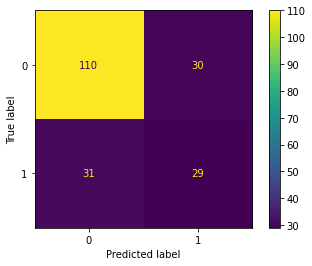

In [93]:
cm = confusion_matrix(y_test, y_predict)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [94]:
print(accuracy_score(y_test, y_predict))
print(precision_score(y_test, y_predict))
print(recall_score(y_test, y_predict))
print(f1_score(y_test, y_predict))

0.695
0.4915254237288136
0.48333333333333334
0.48739495798319327


##### Hyperparameter Tuning

In [95]:
param_grid = [{
    "criterion":['gini', 'entropy', 'log_loss'],
    "max_depth":[2,3,4,5,6,7,8,None],    
}]

grid_search = GridSearchCV(dtc, param_grid, cv = 3, scoring = "accuracy", verbose = 10, refit = True)
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3; 1/24] START criterion=gini, max_depth=2................................
[CV 1/3; 1/24] END ..............criterion=gini, max_depth=2; total time=   0.0s
[CV 2/3; 1/24] START criterion=gini, max_depth=2................................
[CV 2/3; 1/24] END ..............criterion=gini, max_depth=2; total time=   0.0s
[CV 3/3; 1/24] START criterion=gini, max_depth=2................................
[CV 3/3; 1/24] END ..............criterion=gini, max_depth=2; total time=   0.0s
[CV 1/3; 2/24] START criterion=gini, max_depth=3................................
[CV 1/3; 2/24] END ..............criterion=gini, max_depth=3; total time=   0.0s
[CV 2/3; 2/24] START criterion=gini, max_depth=3................................
[CV 2/3; 2/24] END ..............criterion=gini, max_depth=3; total time=   0.0s
[CV 3/3; 2/24] START criterion=gini, max_depth=3................................
[CV 3/3; 2/24] END ..............criterion=gini,

[CV 3/3; 23/24] END .........criterion=log_loss, max_depth=8; total time=   0.0s
[CV 1/3; 24/24] START criterion=log_loss, max_depth=None........................
[CV 1/3; 24/24] END ......criterion=log_loss, max_depth=None; total time=   0.0s
[CV 2/3; 24/24] START criterion=log_loss, max_depth=None........................
[CV 2/3; 24/24] END ......criterion=log_loss, max_depth=None; total time=   0.0s
[CV 3/3; 24/24] START criterion=log_loss, max_depth=None........................
[CV 3/3; 24/24] END ......criterion=log_loss, max_depth=None; total time=   0.0s


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(class_weight={0: 1, 1: 5}),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [2, 3, 4, 5, 6, 7, 8, None]}],
             scoring='accuracy', verbose=10)

In [96]:
final_dtc = grid_search.best_estimator_
final_dtc

DecisionTreeClassifier(class_weight={0: 1, 1: 5}, criterion='entropy')

In [97]:
y_predict = final_dtc.predict(x_test)

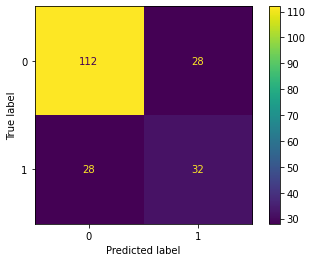

In [98]:
cm = confusion_matrix(y_test, y_predict)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [99]:
print(accuracy_score(y_test, y_predict))
print(precision_score(y_test, y_predict))
print(recall_score(y_test, y_predict))
print(f1_score(y_test, y_predict))

0.72
0.5333333333333333
0.5333333333333333
0.5333333333333333
